In [16]:
random_state = 456

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

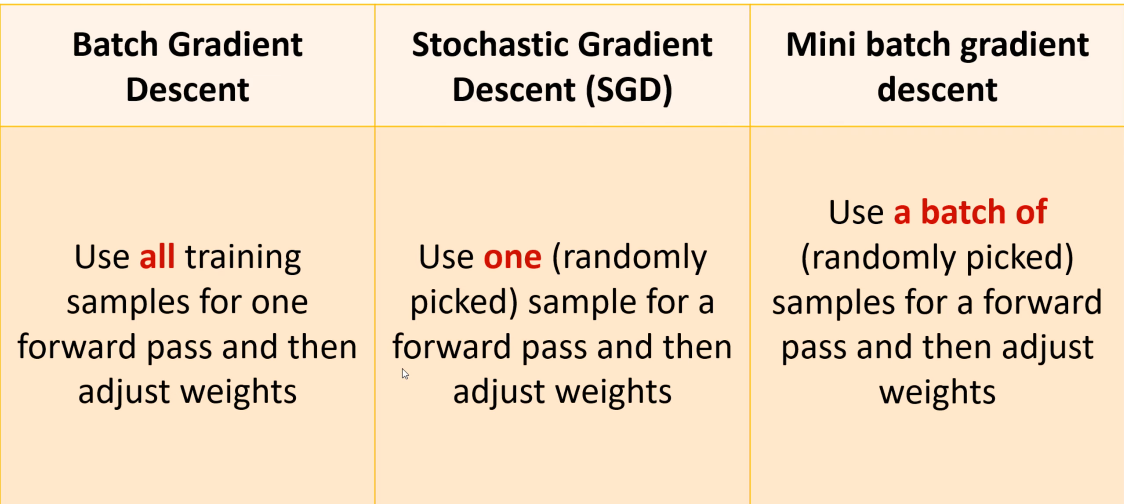

#### Batch Gradient Descent
- Normally we use Batch Gradient Descent to update the weights and biases
- The nature of batch gradient descent is that it will use the whole dataset to calculate the loss and then update the weights and biases
- The problem with that is if our dataset size is huge say (10 million) it will require a lot of time and resource to change the weights and biases
- 
- Batch Gradient Descent reduces Loss in a smooth curve as it is consistent

#### Stochastic Gradient Descent
- Because of demanding Batch Gradient Descent , we decided to take a light weight apprach with Stochastic Gradient descent
- It randomly picks up a datapoint, calculates the loss and updates weights on base of that single datapoint only
- Stochastic Gradient descent usually takes higher iterations to reduce to same loss as Batch Gradient Descent
-
- Stochastic Gradient Descent reduces Loss in a rough curve as it is inconsistent

#### Minibatch Gradient Descent
- Combines both properties of batch and stochastic gradient descent
- Randomly picks up a batch of datapoints, calculates loss on them and the updates the weights
-
- It is neither as consistent as batch nor inconsistent as stochastic

# Dataset

In [204]:
pd.set_option('display.max_rows',None)

In [207]:
df = pd.read_csv('./datasets/model_ready_house_price_prediction.csv')
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDri

In [210]:
col = ['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [212]:
df2 = df[col]
df2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,208500
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,181500
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,223500
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,140000
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,250000


In [221]:
X = df2.drop('SalePrice',axis = 1)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df[['SalePrice']])

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=random_state)

# Batch Gradient Descent

In [223]:
def predict(X,weights,bias):
    _y = sum(np.array(X * weights).T) + bias
    return scaler_y.inverse_transform([_y])

def Batch_Gradient_Descent(X_train,y_train,epochs,learning_rate=0.5):
    
    rows = X_train.shape[0]
    cols = X_train.shape[1]
    
    weights = np.ones(cols)
    bias = 0
    y = np.array(y_train).reshape(rows,)
    lr = learning_rate 
    
    losses = []
    for i in range(epochs):
        _y = sum(np.array(X_train * weights).T) + bias
        loss = sum((_y - y)**2) / rows
        
        weight_slopes = np.array([sum((_y - y)*np.array(X_train.iloc[:,i])*2) for i in range(len(weights))]) / rows
        bias_slope = sum((_y - y)*2) / rows
        
        weights = weights - weight_slopes*lr
        bias = bias - bias_slope*lr
        
        losses.append(loss)
        print(f'Epoch: {i}--loss= {loss}--weights= {weights}--bias= {bias} --->')
        
    return (weights,bias,losses)

In [224]:
weights,bias,losses = Batch_Gradient_Descent(X_train,y_train,1000)

Epoch: 0--loss= 76.17196509934273--weights= [-0.90575737  0.628239   -4.02638196 -3.85702032 -5.39206831 -4.36487421
  0.33922788  0.27448344  0.7317456  -1.13827166 -0.55240999 -0.70953718
 -0.5766737   0.91278095 -1.02635334 -0.29658093  0.74538331 -3.65181536
 -0.81584935 -2.10837191 -1.98377504 -2.33148863 -0.89867988 -5.30085735
 -2.98889684 -2.01731286 -0.01780041  0.18243985  0.69497015  0.94373273
  0.69636891  0.95341565  0.97904186 -3.17827224 -2.99349205]--bias= -8.533334418384975 --->
Epoch: 1--loss= 1164.3119588637885--weights= [ 6.41674481  2.05719864 15.60618608 15.33245556 19.81776106 16.68939882
  2.7890115   3.06069613  1.72998389  7.28861434  5.4839228   5.92058887
  5.25556424  1.20826214  6.71793376  4.69475542  1.68700114 14.49701644
  5.96248728 10.03212874  9.7715863  10.54588644  6.20947925 19.55020183
 12.53179758  9.70684241  3.8485227   3.25244506  1.85141261  1.1557975
  1.78706017  1.09292194  1.06184916 13.28394039 12.70171348]--bias= 25.167871747368544 -

Epoch: 26--loss= 5.432625838347673e+32--weights= [-4.00148773e+15 -7.80907651e+14 -1.06948146e+16 -1.04311319e+16
 -1.37075541e+16 -1.14587051e+16 -1.34825960e+15 -1.52295558e+15
 -5.49342898e+14 -4.58301268e+15 -3.29152379e+15 -3.61710035e+15
 -3.21009778e+15 -1.65891170e+14 -4.23644781e+15 -2.72720122e+15
 -5.18879699e+14 -9.88859211e+15 -3.72403946e+15 -6.61366507e+15
 -6.39350064e+15 -7.02897576e+15 -3.90404619e+15 -1.35125307e+16
 -8.46100910e+15 -6.39320645e+15 -2.11782185e+15 -1.68539810e+15
 -6.33930442e+14 -1.16428738e+14 -6.04351203e+14 -8.05490237e+13
 -4.50459415e+13 -8.95375354e+15 -8.54088806e+15]--bias= -1.8320504294833836e+16 --->
Epoch: 27--loss= 8.35167175225632e+33--weights= [1.56892903e+16 3.06183293e+15 4.19329168e+16 4.08990526e+16
 5.37454594e+16 4.49280278e+16 5.28634292e+15 5.97130216e+15
 2.15389895e+15 1.79693708e+16 1.29056181e+16 1.41821596e+16
 1.25863578e+16 6.50436766e+14 1.66105370e+16 1.06929859e+16
 2.03445688e+15 3.87718277e+16 1.46014533e+16 2.59312

Epoch: 47--loss= 4.539895494193117e+57--weights= [1.15675003e+28 2.25744776e+27 3.09165690e+28 3.01543150e+28
 3.96257960e+28 3.31248236e+28 3.89754871e+27 4.40255984e+27
 1.58804039e+27 1.32485726e+28 9.51513662e+27 1.04563133e+28
 9.27975033e+27 4.79558178e+26 1.22467229e+28 7.88379301e+27
 1.49997738e+27 2.85859410e+28 1.07654529e+28 1.91187823e+28
 1.84823310e+28 2.03193624e+28 1.12858163e+28 3.90620223e+28
 2.44590842e+28 1.84814805e+28 6.12219918e+27 4.87214865e+27
 1.83256606e+27 3.36572184e+26 1.74705839e+27 2.32851109e+26
 1.30218803e+26 2.58835098e+28 2.46899983e+28]--bias= 5.296091191324966e+28 --->
Epoch: 48--loss= 6.979261610363429e+58--weights= [-4.53545989e+28 -8.85114630e+27 -1.21219672e+29 -1.18230977e+29
 -1.55367368e+29 -1.29877938e+29 -1.52817596e+28 -1.72618397e+28
 -6.22649087e+27 -5.19458551e+28 -3.73075594e+28 -4.09977855e+28
 -3.63846417e+28 -1.88028254e+27 -4.80177385e+28 -3.09112825e+28
 -5.88120775e+27 -1.12081596e+29 -4.22098798e+28 -7.49621508e+28
 -7.2466

Epoch: 72--loss= 2.1190265806250863e+87--weights= [-7.90286920e+42 -1.54227913e+42 -2.11220743e+43 -2.06013055e+43
 -2.70721828e+43 -2.26307449e+43 -2.66278944e+42 -3.00781099e+42
 -1.08494274e+42 -9.05137094e+42 -6.50070267e+42 -7.14371077e+42
 -6.33988771e+42 -3.27632198e+41 -8.36691132e+42 -5.38617535e+42
 -1.02477845e+42 -1.95297988e+43 -7.35491365e+42 -1.30618744e+43
 -1.26270534e+43 -1.38821058e+43 -7.71042384e+42 -2.66870149e+43
 -1.67103469e+43 -1.26264724e+43 -4.18266160e+42 -3.32863216e+42
 -1.25200168e+42 -2.29944748e+41 -1.19358320e+42 -1.59082932e+41
 -8.89649570e+40 -1.76835087e+43 -1.68681065e+43]--bias= -3.6182679790933537e+43 --->
Epoch: 73--loss= 3.2576170276194715e+88--weights= [3.09860777e+43 6.04706718e+42 8.28167870e+43 8.07749230e+43
 1.06146355e+44 8.87320796e+43 1.04404360e+43 1.17932187e+43
 4.25391326e+42 3.54891971e+43 2.54883730e+43 2.80095205e+43
 2.48578394e+43 1.28460139e+42 3.28055238e+43 2.11184626e+43
 4.01801723e+42 7.65736906e+43 2.88376183e+43 5.12

Epoch: 97--loss= 9.890698266378745e+116--weights= [5.39920812e+57 1.05367884e+57 1.44305153e+58 1.40747282e+58
 1.84956052e+58 1.54612329e+58 1.81920692e+57 2.05492424e+57
 7.41228472e+56 6.18385984e+57 4.44125365e+57 4.88055416e+57
 4.33138552e+57 2.23836986e+56 5.71623981e+57 3.67981311e+57
 7.00124472e+56 1.33426791e+58 5.02484712e+57 8.92381948e+57
 8.62675158e+57 9.48419827e+57 5.26773023e+57 1.82324601e+58
 1.14164411e+58 8.62635462e+57 2.85757741e+57 2.27410796e+57
 8.55362461e+56 1.57097317e+56 8.15451188e+56 1.08684812e+56
 6.07804971e+55 1.20813013e+58 1.15242218e+58]--bias= 2.4719859790135205e+58 --->
Epoch: 98--loss= 1.5205145316344864e+118--weights= [-2.11695623e+58 -4.13133173e+57 -5.65800923e+58 -5.51850991e+58
 -7.25187582e+58 -6.06213962e+58 -7.13286347e+57 -8.05707909e+57
 -2.90625625e+57 -2.42460752e+58 -1.74135528e+58 -1.91359906e+58
 -1.69827748e+58 -8.77634447e+56 -2.24126006e+58 -1.44280478e+58
 -2.74509304e+57 -5.23148342e+58 -1.97017436e+58 -3.49890852e+58
 -3.

Epoch: 120--loss= 1.953395837373543e+144--weights= [-2.39945009e+71 -4.68263071e+70 -6.41303327e+71 -6.25491869e+71
 -8.21959085e+71 -6.87109219e+71 -8.08469709e+70 -9.13224319e+70
 -3.29407699e+70 -2.74815542e+71 -1.97372767e+71 -2.16895624e+71
 -1.92490142e+71 -9.94748980e+69 -2.54034144e+71 -1.63533757e+71
 -3.11140762e+70 -5.92959040e+71 -2.23308115e+71 -3.96581480e+71
 -3.83379551e+71 -4.21485149e+71 -2.34102029e+71 -8.10264712e+71
 -5.07355524e+71 -3.83361910e+71 -1.26992963e+71 -1.01063127e+71
 -3.80129732e+70 -6.98152699e+69 -3.62392852e+70 -4.83003761e+69
 -2.70113257e+69 -5.36902428e+71 -5.12145382e+71]--bias= -1.0985697988650402e+72 --->
Epoch: 121--loss= 3.002989957602094e+145--weights= [9.40791818e+71 1.83599596e+71 2.51446332e+72 2.45246873e+72
 3.22279003e+72 2.69406200e+72 3.16990001e+71 3.58062863e+71
 1.29156289e+71 1.07751444e+72 7.73871834e+71 8.50418306e+71
 7.54727724e+71 3.90027575e+70 9.96033404e+71 6.41193669e+71
 1.21994070e+71 2.32491193e+72 8.75560813e+71 1.

Epoch: 143--loss= 3.85792306539076e+171--weights= [1.06633429e+85 2.08099752e+84 2.85000187e+85 2.77973452e+85
 3.65285011e+85 3.05356682e+85 3.59290228e+84 4.05843992e+84
 1.46391344e+84 1.22130165e+85 8.77139930e+84 9.63901024e+84
 8.55441165e+84 4.42074185e+83 1.12894750e+85 7.26756738e+84
 1.38273375e+84 2.63515610e+85 9.92398633e+84 1.76243895e+85
 1.70376855e+85 1.87311279e+85 1.04036763e+85 3.60087941e+85
 2.25472742e+85 1.70369015e+85 5.64366606e+84 4.49132398e+84
 1.68932610e+84 3.10264491e+83 1.61050202e+84 2.14650629e+83
 1.20040433e+83 2.38603615e+85 2.27601392e+85]--bias= 4.8821296448452936e+85 --->
Epoch: 144--loss= 5.930853338024431e+172--weights= [-4.18095202e+85 -8.15930886e+84 -1.11744706e+86 -1.08989618e+86
 -1.43223296e+86 -1.19726211e+86 -1.40872822e+85 -1.59125922e+85
 -5.73980593e+84 -4.78855801e+85 -3.43914663e+85 -3.77932511e+85
 -3.35406872e+85 -1.73331289e+84 -4.42644993e+85 -2.84951454e+85
 -5.42151139e+84 -1.03320895e+86 -3.89106037e+85 -6.91028393e+85
 -6.

Epoch: 166--loss= 7.619331470720127e+198--weights= [-4.73887251e+98 -9.24811484e+97 -1.26656300e+99 -1.23533565e+99
 -1.62335501e+99 -1.35702885e+99 -1.59671372e+98 -1.80360227e+98
 -6.50574520e+97 -5.42755952e+98 -3.89807808e+98 -4.28365113e+98
 -3.80164708e+98 -1.96461207e+97 -5.01713050e+98 -3.22976348e+98
 -6.14497635e+97 -1.17108387e+99 -4.41029673e+98 -7.83241578e+98
 -7.57167997e+98 -8.32425895e+98 -4.62347468e+98 -1.60025882e+99
 -1.00201840e+99 -7.57133156e+98 -2.50808910e+98 -1.99597931e+98
 -7.50749660e+97 -1.37883953e+97 -7.15719627e+97 -9.53924091e+96
 -5.33469021e+96 -1.06037303e+99 -1.01147829e+99]--bias= -2.1696563926754435e+99 --->
Epoch: 167--loss= 1.1713332982719298e+200--weights= [1.85804760e+99 3.62606033e+98 4.96602165e+99 4.84358342e+99
 6.36495468e+99 5.32072596e+99 6.26049782e+98 7.07167974e+98
 2.55081441e+98 2.12807243e+99 1.52838352e+99 1.67956148e+99
 1.49057423e+99 7.70297730e+97 1.96714878e+99 1.26634643e+99
 2.40936183e+98 4.59166093e+99 1.72921750e+99 3

Epoch: 187--loss= 6.367265046769122e+223--weights= [1.36991322e+111 2.67344494e+110 3.66138020e+111 3.57110816e+111
 4.69279449e+111 3.92289886e+111 4.61577986e+110 5.21385325e+110
 1.88068076e+110 1.56899885e+111 1.12685637e+111 1.23831783e+111
 1.09898010e+111 5.67930036e+109 1.45035203e+111 9.33659993e+110
 1.77638970e+110 3.38536913e+111 1.27492853e+111 2.26419467e+111
 2.18882117e+111 2.40637669e+111 1.33655401e+111 4.62602803e+111
 2.89663470e+111 2.18872045e+111 7.25038371e+110 5.76997679e+110
 2.17026704e+110 3.98594918e+109 2.06900222e+110 2.75760366e+109
 1.54215219e+109 3.06532624e+111 2.92398134e+111]--bias= 6.272042474666242e+111 --->
Epoch: 188--loss= 9.788509132151916e+224--weights= [-5.37124382e+111 -1.04822148e+111 -1.43557749e+112 -1.40018305e+112
 -1.83998103e+112 -1.53811541e+112 -1.80978464e+111 -2.04428111e+111
 -7.37389402e+110 -6.15183156e+111 -4.41825091e+111 -4.85527614e+111
 -4.30895183e+111 -2.22677660e+110 -5.68663349e+111 -3.66075413e+111
 -6.96498294e+110

Epoch: 207--loss= 3.461189418555725e+247--weights= [1.01001838e+123 1.97109458e+122 2.69948580e+123 2.63292946e+123
 3.45993352e+123 2.89229995e+123 3.40315169e+122 3.84410306e+122
 1.38660033e+122 1.15680150e+123 8.30815871e+122 9.12994884e+122
 8.10263074e+122 4.18727088e+121 1.06932482e+123 6.88374809e+122
 1.30970796e+122 2.49598660e+123 9.39987460e+122 1.66935992e+123
 1.61378807e+123 1.77418879e+123 9.85423088e+122 3.41070753e+123
 2.13564935e+123 1.61371381e+123 5.34560926e+122 4.25412538e+122
 1.60010836e+122 2.93878609e+121 1.52544719e+122 2.03314366e+121
 1.13700783e+121 2.26002333e+123 2.15581166e+123]--bias= 4.624291579538832e+123 --->
Epoch: 208--loss= 5.320947688337812e+248--weights= [-3.96014499e+123 -7.72839436e+122 -1.05843175e+124 -1.03233591e+124
 -1.35659298e+124 -1.13403156e+124 -1.33432959e+123 -1.50722064e+123
 -5.43667173e+122 -4.53566171e+123 -3.25751628e+123 -3.57972904e+123
 -3.17693156e+123 -1.64177209e+122 -4.19267750e+123 -2.69902421e+123
 -5.13518716e+122

Epoch: 231--loss= 1.0508779850875915e+276--weights= [1.75991924e+137 3.43455858e+136 4.70375303e+137 4.58778109e+137
 6.02880474e+137 5.03972447e+137 5.92986452e+136 6.69820579e+136
 2.41609921e+136 2.01568335e+137 1.44766558e+137 1.59085943e+137
 1.41185310e+137 7.29616288e+135 1.86325850e+137 1.19946735e+137
 2.28211712e+136 4.34916328e+137 1.63789299e+137 2.90879722e+137
 2.81196534e+137 3.09145760e+137 1.71706287e+137 5.94303028e+137
 3.72128911e+137 2.81183594e+137 9.31452417e+136 7.41265434e+136
 2.78812896e+136 5.12072484e+135 2.65803466e+136 3.54267678e+135
 1.98119361e+135 3.93800611e+137 3.75642117e+137]--bias= 8.057655094340292e+137 --->
Epoch: 232--loss= 1.615533306411812e+277--weights= [-6.90040450e+137 -1.34664381e+137 -1.84427773e+138 -1.79880670e+138
 -2.36381252e+138 -1.97600757e+138 -2.32501940e+137 -2.62627559e+137
 -9.47319713e+136 -7.90322086e+137 -5.67610027e+137 -6.23754395e+137
 -5.53568439e+137 -2.86072645e+136 -7.30558371e+137 -4.70294872e+137
 -8.94787153e+13

Epoch: 254--loss= 2.0754658835722004e+303--weights= [-7.82121800e+150 -1.52634455e+150 -2.09038444e+151 -2.03884560e+151
 -2.67924772e+151 -2.23969276e+151 -2.63527792e+150 -2.97673476e+150
 -1.07373328e+150 -8.95785360e+150 -6.43353844e+150 -7.06990307e+150
 -6.27438499e+150 -3.24247154e+149 -8.28046571e+150 -5.33052623e+150
 -1.01419060e+150 -1.93280200e+151 -7.27892384e+150 -1.29269211e+151
 -1.24965927e+151 -1.37386781e+151 -7.63076096e+150 -2.64112889e+151
 -1.65376983e+151 -1.24960177e+151 -4.13944700e+150 -3.29424125e+150
 -1.23906620e+150 -2.27568995e+149 -1.18125128e+150 -1.57439312e+149
 -8.80457851e+148 -1.75008055e+151 -1.66938279e+151]--bias= -3.5808846051164745e+151 --->
Epoch: 255--loss= 3.1906503978697843e+304--weights= [3.06659344e+151 5.98458984e+150 8.19611370e+151 7.99403693e+151
 1.05049667e+152 8.78153137e+151 1.03325671e+151 1.16713730e+151
 4.20996250e+150 3.51225283e+151 2.52250311e+151 2.77201305e+151
 2.46010121e+151 1.27132909e+150 3.24665823e+151 2.09002700

<ipython-input-223-db31139a0e4a>:18: RuntimeWarning: overflow encountered in double_scalars
  loss = sum((_y - y)**2) / rows
<ipython-input-223-db31139a0e4a>:18: RuntimeWarning: overflow encountered in square
  loss = sum((_y - y)**2) / rows


Epoch: 278--loss= inf--weights= [-1.36281798e+165 -2.65959828e+164 -3.64241669e+165 -3.55261220e+165
 -4.66848894e+165 -3.90258085e+165 -4.59187320e+164 -5.18684897e+164
 -1.87094008e+164 -1.56087248e+165 -1.12102001e+165 -1.23190416e+165
 -1.09328811e+165 -5.64988537e+163 -1.44284017e+165 -9.28824256e+164
 -1.76718918e+164 -3.36783518e+165 -1.26832525e+165 -2.25246765e+165
 -2.17748453e+165 -2.39391326e+165 -1.32963155e+165 -4.60206829e+165
 -2.88163206e+165 -2.17738433e+165 -7.21283155e+164 -5.74009216e+164
 -2.15902650e+164 -3.96530461e+163 -2.05828617e+164 -2.74332111e+163
 -1.53416487e+163 -3.04944989e+165 -2.90883706e+165]--bias= -6.239557472614832e+165 --->
Epoch: 279--loss= inf--weights= [5.34342435e+165 1.04279239e+165 1.42814215e+166 1.39293103e+166
 1.83045116e+166 1.53014899e+166 1.80041117e+165 2.03369309e+165
 7.33570216e+164 6.11996917e+165 4.39536732e+165 4.83012905e+165
 4.28663433e+165 2.21524338e+164 5.65718052e+165 3.64179386e+165
 6.92890897e+164 1.32048247e+166 4.

Epoch: 291--loss= inf--weights= [7.05344683e+172 1.37651068e+172 1.88518150e+173 1.83870199e+173
 2.41623893e+173 2.01983295e+173 2.37658542e+172 2.68452310e+172
 9.68330078e+171 8.07850441e+172 5.80198907e+172 6.37588486e+172
 5.65845895e+172 2.92417378e+171 7.46761241e+172 4.80725424e+172
 9.14632412e+171 1.74306817e+173 6.56438707e+172 1.16579478e+173
 1.12698626e+173 1.23900185e+173 6.88168604e+172 2.38186203e+173
 1.49142724e+173 1.12693440e+173 3.73309750e+172 2.97086151e+172
 1.11743306e+172 2.05229647e+171 1.06529355e+172 1.41984256e+171
 7.94027560e+170 1.57828360e+173 1.50550755e+173]--bias= 3.229366471967113e+173 --->
Epoch: 292--loss= inf--weights= [-2.76556078e+173 -5.39711158e+172 -7.39154084e+173 -7.20930096e+173
 -9.47374493e+173 -7.91949088e+173 -9.31826893e+172 -1.05256508e+173
 -3.79669083e+172 -3.16747195e+173 -2.27488118e+173 -2.49989793e+173
 -2.21860496e+173 -1.14652886e+172 -2.92794949e+173 -1.88485915e+173
 -3.58614956e+172 -6.83433373e+173 -2.57380709e+173 -4.

Epoch: 316--loss= inf--weights= [-4.81888621e+187 -9.40426504e+186 -1.28794834e+188 -1.25619372e+188
 -1.65076461e+188 -1.37994166e+188 -1.62367350e+187 -1.83405527e+187
 -6.61559174e+186 -5.51920138e+187 -3.96389535e+187 -4.35597863e+187
 -3.86583616e+187 -1.99778364e+186 -5.10184245e+187 -3.28429656e+187
 -6.24873147e+186 -1.19085709e+188 -4.48476257e+187 -7.96466254e+187
 -7.69952433e+187 -8.46481026e+187 -4.70153994e+187 -1.62727846e+188
 -1.01893703e+188 -7.69917003e+187 -2.55043704e+187 -2.02968051e+187
 -7.63425725e+186 -1.40212061e+186 -7.27804226e+186 -9.70030664e+185
 -5.42476402e+185 -1.07827694e+188 -1.02855664e+188]--bias= -2.2062900498042593e+188 --->
Epoch: 317--loss= inf--weights= [1.88941989e+188 3.68728470e+187 5.04987066e+188 4.92536512e+188
 6.47242403e+188 5.41056399e+188 6.36620346e+187 7.19108182e+187
 2.59388374e+187 2.16400396e+188 1.55418957e+188 1.70792011e+188
 1.51574189e+188 7.83303855e+186 2.00036319e+188 1.28772811e+188
 2.45004281e+187 4.66918903e+188 1

Epoch: 340--loss= inf--weights= [-8.39672896e+201 -1.63865800e+201 -2.24420180e+202 -2.18887057e+202
 -2.87639559e+202 -2.40449673e+202 -2.82919034e+201 -3.19577270e+201
 -1.15274211e+201 -9.61700195e+201 -6.90693937e+201 -7.59012981e+201
 -6.73607489e+201 -3.48106327e+200 -8.88976963e+201 -5.72276390e+201
 -1.08881808e+201 -2.07502393e+202 -7.81453102e+201 -1.38781265e+202
 -1.34161331e+202 -1.47496152e+202 -8.19225747e+201 -2.83547185e+202
 -1.77545965e+202 -1.34155158e+202 -4.44404114e+201 -3.53664237e+201
 -1.33024077e+201 -2.44314271e+200 -1.26817164e+201 -1.69024215e+200
 -9.45244838e+199 -1.87885724e+202 -1.79222147e+202]--bias= -3.8443778800752987e+202 --->
Epoch: 341--loss= inf--weights= [3.29224348e+202 6.42495566e+201 8.79921072e+202 8.58226447e+202
 1.12779568e+203 9.42770535e+202 1.10928714e+202 1.25301911e+202
 4.51974539e+201 3.77069595e+202 2.70811720e+202 2.97598690e+202
 2.64112355e+202 1.36487767e+201 3.48555803e+202 2.24381806e+202
 4.26910794e+201 8.13588722e+202 3

Epoch: 364--loss= inf--weights= [-1.46309861e+216 -2.85530027e+215 -3.91043770e+216 -3.81402509e+216
 -5.01201172e+216 -4.18974560e+216 -4.92975834e+215 -5.56851439e+215
 -2.00861001e+215 -1.67572661e+216 -1.20350835e+216 -1.32255173e+216
 -1.17373585e+216 -6.06562253e+214 -1.54900910e+216 -9.97170202e+215
 -1.89722478e+215 -3.61565157e+216 -1.36165280e+216 -2.41821163e+216
 -2.33771101e+216 -2.57006528e+216 -1.42747022e+216 -4.94070362e+216
 -3.09367203e+216 -2.33760344e+216 -7.74357544e+215 -6.16246703e+215
 -2.31789478e+215 -4.25708478e+214 -2.20974164e+215 -2.94518371e+214
 -1.64705377e+214 -3.27383845e+216 -3.12287887e+216]--bias= -6.698684647616242e+216 --->
Epoch: 365--loss= inf--weights= [5.73661110e+216 1.11952449e+216 1.53322955e+217 1.49542748e+217
 1.96514178e+217 1.64274239e+217 1.93289134e+216 2.18333892e+216
 7.87548727e+215 6.57029665e+216 4.71879291e+216 5.18554584e+216
 4.60205899e+216 2.37824828e+215 6.07345448e+216 3.90976904e+216
 7.43876090e+215 1.41764791e+217 5.

Epoch: 387--loss= inf--weights= [6.50212405e+229 1.26891765e+229 1.73782893e+230 1.69498242e+230
 2.22737700e+230 1.86195554e+230 2.19082295e+229 2.47469111e+229
 8.92641914e+228 7.44705943e+229 5.34848472e+229 5.87752276e+229
 5.21617343e+229 2.69560984e+228 6.88391695e+229 4.43150195e+229
 8.43141451e+228 1.60682369e+230 6.05129096e+229 1.07467206e+230
 1.03889696e+230 1.14215700e+230 6.34378869e+229 2.19568712e+230
 1.37485192e+230 1.03884915e+230 3.44130516e+229 2.73864829e+229
 1.03009047e+229 1.89188159e+228 9.82026375e+228 1.30886255e+228
 7.31963508e+227 1.45491928e+230 1.38783166e+230]--bias= 2.976947567044386e+230 --->
Epoch: 388--loss= inf--weights= [-2.54939460e+230 -4.97525392e+229 -6.81379140e+230 -6.64579605e+230
 -8.73324293e+230 -7.30047498e+230 -8.58991950e+229 -9.70292801e+229
 -3.49992781e+229 -2.91989094e+230 -2.09706828e+230 -2.30449691e+230
 -2.04519082e+230 -1.05691204e+229 -2.69909042e+230 -1.73753177e+230
 -3.30584321e+229 -6.30013761e+230 -2.37262906e+230 -4.

Epoch: 411--loss= inf--weights= [1.13297079e+244 2.21104154e+243 3.02810191e+244 2.95344346e+244
 3.88112110e+244 3.24438787e+244 3.81742705e+243 4.31205669e+243
 1.55539514e+243 1.29762225e+244 9.31953455e+243 1.02413635e+244
 9.08898708e+243 4.69699930e+242 1.19949678e+244 7.72172637e+243
 1.46914244e+243 2.79983016e+244 1.05441481e+244 1.87257587e+244
 1.81023909e+244 1.99016585e+244 1.10538145e+244 3.82590268e+244
 2.39562804e+244 1.81015579e+244 5.99634552e+243 4.77199219e+243
 1.79489411e+243 3.29653290e+242 1.71114422e+243 2.28064404e+242
 1.27541903e+242 2.53514241e+244 2.41824476e+244]--bias= 5.187219775525312e+244 --->
Epoch: 412--loss= inf--weights= [-4.44222472e+244 -8.66919384e+243 -1.18727766e+245 -1.15800510e+245
 -1.52173491e+245 -1.27208046e+245 -1.49676134e+244 -1.69069891e+244
 -6.09849328e+243 -5.08780074e+244 -3.65406303e+244 -4.01549966e+244
 -3.56366849e+244 -1.84162968e+243 -4.70306409e+244 -3.02758412e+244
 -5.76030813e+243 -1.09777541e+245 -4.13421739e+244 -7.

Epoch: 435--loss= inf--weights= [1.97415922e+258 3.85265718e+257 5.27635430e+258 5.14626476e+258
 6.76270833e+258 5.65322450e+258 6.65172383e+257 7.51359748e+257
 2.71021786e+257 2.26105823e+258 1.62389403e+258 1.78451929e+258
 1.58372200e+258 8.18434558e+256 2.09007827e+258 1.34548194e+258
 2.55992574e+257 4.87859933e+258 1.83727837e+258 3.26289340e+258
 3.15427389e+258 3.46778955e+258 1.92608583e+258 6.66649230e+258
 4.17429224e+258 3.15412875e+258 1.04484078e+258 8.31501789e+257
 3.12753584e+257 5.74408527e+256 2.98160480e+257 3.97393692e+256
 2.22236995e+256 4.41739082e+258 4.21370103e+258]--bias= 9.038536418132282e+258 --->
Epoch: 436--loss= inf--weights= [-7.74041041e+258 -1.51057460e+258 -2.06878692e+259 -2.01778057e+259
 -2.65156616e+259 -2.21655261e+259 -2.60805064e+258 -2.94597961e+258
 -1.06263964e+258 -8.86530247e+258 -6.36706813e+258 -6.99685795e+258
 -6.20955904e+258 -3.20897084e+257 -8.19491324e+258 -5.27545208e+258
 -1.00371214e+258 -1.91283259e+259 -7.20371915e+258 -1.

Epoch: 457--loss= inf--weights= [2.23759776e+271 4.36676889e+270 5.98044900e+271 5.83299987e+271
 7.66514718e+271 6.40761005e+271 7.53935253e+270 8.51623754e+270
 3.07187857e+270 2.56278155e+271 1.84059199e+271 2.02265162e+271
 1.79505926e+271 9.27649256e+269 2.36898543e+271 1.52502763e+271
 2.90153096e+270 5.52961625e+271 2.08245106e+271 3.69830502e+271
 3.57519095e+271 3.93054321e+271 2.18310929e+271 7.55609176e+271
 4.73132402e+271 3.57502644e+271 1.18426789e+271 9.42460222e+270
 3.54488489e+270 6.51059559e+269 3.37948031e+270 4.50423261e+269
 2.51893058e+269 5.00686251e+271 4.77599166e+271]--bias= 1.0244669531065034e+272 --->
Epoch: 458--loss= inf--weights= [-8.77331716e+271 -1.71215082e+271 -2.34485289e+272 -2.28704009e+272
 -3.00540019e+272 -2.51233694e+272 -2.95607781e+271 -3.33910117e+271
 -1.20444190e+271 -1.00483187e+272 -7.21671141e+271 -7.93054253e+271
 -7.03818376e+271 -3.63718684e+270 -9.28847040e+271 -5.97942639e+271
 -1.13765091e+271 -2.16808749e+272 -8.16500799e+271 -1

Epoch: 476--loss= inf--weights= [-4.20761919e+282 -8.21135099e+281 -1.12457442e+283 -1.09684782e+283
 -1.44136810e+283 -1.20489855e+283 -1.41771345e+282 -1.60140867e+282
 -5.77641586e+281 -4.81910065e+282 -3.46108238e+282 -3.80343060e+282
 -3.37546181e+282 -1.74436839e+281 -4.45468294e+282 -2.86768947e+282
 -5.45609115e+281 -1.03979901e+283 -3.91587853e+282 -6.95435947e+282
 -6.72285356e+282 -7.39106435e+282 -4.10515808e+282 -1.42086112e+283
 -8.89686704e+282 -6.72254421e+282 -2.22691870e+282 -1.77221920e+282
 -6.66586549e+281 -1.22426414e+281 -6.35483573e+281 -8.46984025e+280
 -4.73664249e+280 -9.41499458e+282 -8.98086086e+282]--bias= -1.9264261378357635e+283 --->
Epoch: 477--loss= inf--weights= [1.64975038e+283 3.21955929e+282 4.40930368e+283 4.30059144e+283
 5.65140872e+283 4.72424371e+283 5.55866204e+282 6.27890607e+282
 2.26485427e+282 1.88950396e+283 1.35704343e+283 1.49127352e+283
 1.32347277e+283 6.83943175e+281 1.74662073e+283 1.12438212e+283
 2.13925930e+282 4.07691083e+283 1

Epoch: 497--loss= inf--weights= [1.21633851e+295 2.37373726e+294 3.25091961e+295 3.17076755e+295
 4.16670676e+295 3.48312061e+295 4.09832589e+294 4.62935201e+294
 1.66984624e+294 1.39310556e+295 1.00052966e+295 1.09949568e+295
 9.75778466e+294 5.04261997e+293 1.28775970e+295 8.28991641e+294
 1.57724677e+294 3.00585088e+295 1.13200213e+295 2.01036616e+295
 1.94344244e+295 2.13660881e+295 1.18671905e+295 4.10742519e+295
 2.57190623e+295 1.94335301e+295 6.43757636e+294 5.12313108e+294
 1.92696833e+294 3.53910264e+293 1.83705585e+294 2.44846133e+293
 1.36926856e+293 2.72168653e+295 2.59618716e+295]--bias= 5.568912479230796e+295 --->
Epoch: 498--loss= inf--weights= [-4.76909824e+295 -9.30710166e+294 -1.27464146e+296 -1.24321493e+296
 -1.63370918e+296 -1.36568432e+296 -1.60689797e+295 -1.81510610e+295
 -6.54724049e+294 -5.46217786e+295 -3.92294101e+295 -4.31097334e+295
 -3.82589495e+295 -1.97714286e+294 -5.04913102e+295 -3.25036373e+295
 -6.18417056e+294 -1.17855334e+296 -4.43842671e+295 -7.

<ipython-input-223-db31139a0e4a>:20: RuntimeWarning: overflow encountered in double_scalars
  weight_slopes = np.array([sum((_y - y)*np.array(X_train.iloc[:,i])*2) for i in range(len(weights))]) / rows
<ipython-input-223-db31139a0e4a>:21: RuntimeWarning: overflow encountered in double_scalars
  bias_slope = sum((_y - y)*2) / rows
<ipython-input-223-db31139a0e4a>:20: RuntimeWarning: invalid value encountered in multiply
  weight_slopes = np.array([sum((_y - y)*np.array(X_train.iloc[:,i])*2) for i in range(len(weights))]) / rows


Epoch: 521--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 522--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 523--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 524--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 525--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 526--loss= nan--weights= [nan nan nan 

Epoch: 570--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 571--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 572--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 573--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 574--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 575--loss= nan--weights= [nan nan nan 

Epoch: 619--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 620--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 621--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 622--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 623--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 624--loss= nan--weights= [nan nan nan 

Epoch: 662--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 663--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 664--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 665--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 666--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 667--loss= nan--weights= [nan nan nan 

Epoch: 713--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 714--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 715--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 716--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 717--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 718--loss= nan--weights= [nan nan nan 

Epoch: 765--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 766--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 767--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 768--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 769--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 770--loss= nan--weights= [nan nan nan 

Epoch: 817--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 818--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 819--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 820--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 821--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 822--loss= nan--weights= [nan nan nan 

Epoch: 868--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 869--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 870--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 871--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 872--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 873--loss= nan--weights= [nan nan nan 

Epoch: 921--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 922--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 923--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 924--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 925--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 926--loss= nan--weights= [nan nan nan 

Epoch: 973--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 974--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 975--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 976--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 977--loss= nan--weights= [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]--bias= nan --->
Epoch: 978--loss= nan--weights= [nan nan nan 

In [101]:
predict(X_test,weights,bias)

array([[11597.31836925, 41657.4730602 , 29943.17182676]])

In [104]:
scaler_y.inverse_transform(y_test)

array([[12000.],
       [40000.],
       [33000.]])

<AxesSubplot:>

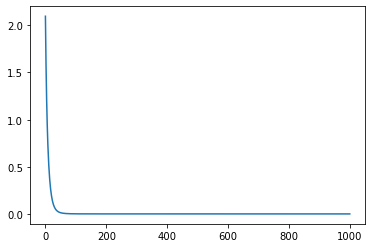

In [107]:
# reduction of loss
pd.Series(losses).plot()

# Stochastic Gradient Descent

In [160]:
def predict(X,weights,bias):
    _y = sum(np.array(X * weights).T) + bias
    return scaler_y.inverse_transform([_y])

def Stochastic_Gradient_Descent(X_train,y_train,epochs,learning_rate=0.5):
    
    rows = X_train.shape[0]
    cols = X_train.shape[1]
    
    X_train = X_train.reset_index().drop('index',axis = 1)
    y = np.array(y_train).reshape(rows,)
    
    weights = np.ones(cols)
    bias = 0
    lr = learning_rate 
    
    losses = []
    for i in range(epochs):
        
        index = np.random.randint(rows)
        
        _y = sum(X_train.iloc[index] * weights) + bias
        loss = (_y - y[index])**2
        
        weight_slopes = np.array([(_y - y[index])*(X_train.iloc[index,i])*2 for i in range(len(weights))])
        bias_slope = (_y - y[index])*2
        
        weights = weights - weight_slopes*lr
        bias = bias - bias_slope*lr
        
        losses.append(loss)
        print(f'{weight_slopes}----{bias_slope}')
        print(f'Epoch: {i}--loss= {loss}--weights= {weights}--bias= {bias} --->')
        
    return (weights,bias,losses)

In [161]:
weights,bias,losses = Stochastic_Gradient_Descent(X_train,y_train,5000)

[3.91831769 2.54547646 2.61221179]----3.9183176920403193
Epoch: 0--loss= 3.8383033839390435--weights= [-0.95915885 -0.27273823 -0.3061059 ]--bias= -1.9591588460201597 --->
[-3.42353354 -2.94873692 -3.42353354]-----6.847067082631977
Epoch: 1--loss= 11.720581908515593--weights= [0.75260792 1.20163023 1.40566087]--bias= 1.4643746952958288 --->
[2.34671377 2.02125712 2.34671377]----4.69342754284201
Epoch: 2--loss= 5.507065524976998--weights= [-0.42074896  0.19100167  0.23230399]--bias= -0.8823390761251764 --->
[-1.49621552 -1.59450705 -1.49621552]-----2.992431040986636
Epoch: 3--loss= 2.2386608837650908--weights= [0.3273588  0.9882552  0.98041175]--bias= 0.6138764443681417 --->
[1.88459001 2.72371403 2.51278668]----3.769180015323034
Epoch: 4--loss= 3.5516794969776364--weights= [-0.6149362  -0.37360181 -0.27598159]--bias= -1.2707135632933753 --->
[-5.33897036 -3.46838221 -3.55931357]-----5.338970361561382
Epoch: 5--loss= 7.126151130407719--weights= [2.05454898 1.36058929 1.5036752 ]--bias= 

[      0.         6972056.67114939 6921534.52135845]----13843069.042716907
Epoch: 498--loss= 47907640130356.8--weights= [-1893756.12529653  1198859.60720175  -202498.52444896]--bias= -3988675.9671099437 --->
[      -0.         -2500872.44895215 -2429925.71281166]-----7289777.138434989
Epoch: 499--loss= 13285212682012.355--weights= [-1893756.12529653  2449295.83167783  1012464.33195687]--bias= -343787.39789244905 --->
[      0.         2706977.85892282 2658465.71091345]----3987698.5663701775
Epoch: 500--loss= 3975434964057.6924--weights= [-1893756.12529653  1095806.90221642  -316768.52349986]--bias= -2337636.681077538 --->
[      -0.         -2450511.97454965 -2406595.98934267]-----3609893.9840139993
Epoch: 501--loss= 3257833643955.116--weights= [-1893756.12529653  2321062.88949124   886529.47117148]--bias= -532689.6890705384 --->
[724636.62106139 640007.52663086 603863.85088449]----724636.621061388
Epoch: 502--loss= 131274558145.81642--weights= [-2256074.43582722  2001059.12617581   58

[2.64100119e+10 2.81449762e+10 2.64100119e+10]----52820023854.45752
Epoch: 828--loss= 6.974887299963654e+20--weights= [5.64624920e+10 1.26783993e+11 3.23381577e+10]--bias= -132660244012.77429 --->
[-2.0703485e+10 -2.2063568e+10 -2.0703485e+10]-----41406970056.07977
Epoch: 829--loss= 4.286342923062717e+20--weights= [6.68142345e+10 1.37815777e+11 4.26899002e+10]--bias= -111956758984.7344 --->
[-0.00000000e+00 -2.13556946e+10 -2.12009432e+10]-----42401886363.14526
Epoch: 830--loss= 4.4947999178827104e+20--weights= [6.68142345e+10 1.48493624e+11 5.32903718e+10]--bias= -90755815803.16177 --->
[0.00000000e+00 1.07560722e+10 1.06781297e+10]----21356259377.825287
Epoch: 831--loss= 1.1402245365323763e+20--weights= [6.68142345e+10 1.43115588e+11 4.79513070e+10]--bias= -101433945492.07442 --->
[6.73600033e+10 9.73524135e+10 8.98133377e+10]----134720006507.75034
Epoch: 832--loss= 4.537370038362073e+21--weights= [3.31342329e+10 9.44393813e+10 3.04463812e+09]--bias= -168793948745.9496 --->
[-1.44557

[-7.52182690e+14 -6.47865382e+14 -7.52182690e+14]-----1504365379666739.0
Epoch: 1283--loss= 5.6577879888496296e+29--weights= [ 1.18640046e+14 -8.28956611e+13  1.11026608e+13]--bias= 486423442692857.1 --->
[0.00000000e+00 3.16777031e+14 3.07790448e+14]----923371344310778.2
Epoch: 1284--loss= 2.1315365987357346e+29--weights= [ 1.18640046e+14 -2.41284176e+14 -1.42792563e+14]--bias= 24737770537468.0 --->
[-0.00000000e+00 -1.57266238e+13 -1.43636497e+13]-----86181898404120.05
Epoch: 1285--loss= 1.8568299031345173e+27--weights= [ 1.18640046e+14 -2.33420864e+14 -1.35610738e+14]--bias= 67828719739528.02 --->
[-0.00000000e+00 -1.18396931e+14 -1.17538983e+14]-----235077965341752.88
Epoch: 1286--loss= 1.3815412447304591e+28--weights= [ 1.18640046e+14 -1.74222399e+14 -7.68412471e+13]--bias= 185367702410404.47 --->
[1.72196237e+14 1.52085727e+14 1.43496864e+14]----172196236504672.94
Epoch: 1287--loss= 7.412885966593314e+27--weights= [ 3.25419274e+13 -2.50265262e+14 -1.48589679e+14]--bias= 992695841

Epoch: 1577--loss= 1.0937603352719863e+35--weights= [-9.36939064e+17  4.47850835e+17  3.02752517e+17]--bias= -1.1198382170308192e+17 --->
[0.00000000e+00 9.78258283e+16 9.50506275e+16]----2.851518825597868e+17
Epoch: 1578--loss= 2.0327899031847614e+34--weights= [-9.36939064e+17  3.98937921e+17  2.55227203e+17]--bias= -2.5455976298297533e+17 --->
[0.00000000e+00 7.45187680e+16 7.39787769e+16]----1.4795755389298848e+17
Epoch: 1579--loss= 5.472859438499148e+33--weights= [-9.36939064e+17  3.61678537e+17  2.18237815e+17]--bias= -3.285385399294696e+17 --->
[-1.52834810e+18 -1.34985489e+18 -1.27362342e+18]-----1.5283481003552049e+18
Epoch: 1580--loss= 5.8396197896484084e+35--weights= [-1.72765014e+17  1.03660598e+18  8.55049523e+17]--bias= 4.3563551024813286e+17 --->
[3.01263816e+18 1.95711530e+18 2.00842544e+18]----3.012638155249223e+18
Epoch: 1581--loss= 2.2689971636158605e+36--weights= [-1.67908409e+18  5.80483339e+16 -1.49163195e+17]--bias= -1.0706835673764787e+18 --->
[-5.65238208e+18 -4

[0.00000000e+00 1.05729007e+28 9.65658261e+27]----5.793949563428584e+28
Epoch: 1901--loss= 8.39246288588857e+56--weights= [-2.92678880e+27  1.59866385e+28  1.40910705e+28]--bias= -7.035177482272382e+27 --->
[2.99333039e+28 2.46895134e+28 2.49444199e+28]----2.9933303904997393e+28
Epoch: 1902--loss= 2.2400067066723306e+56--weights= [-1.78934408e+28  3.64188178e+27  1.61886053e+27]--bias= -2.200182943477108e+28 --->
[-7.10846637e+28 -5.86318759e+28 -5.92372198e+28]-----7.108466370793372e+28
Epoch: 1903--loss= 1.2632573536175073e+57--weights= [1.76488911e+28 3.29578197e+28 3.12374704e+28]--bias= 1.354050241919578e+28 --->
[0.00000000e+00 2.41927799e+28 2.35064599e+28]----7.051937967187715e+28
Epoch: 1904--loss= 1.24324572732659e+57--weights= [1.76488911e+28 2.08614298e+28 1.94842405e+28]--bias= -2.1719187416742795e+28 --->
[5.87468870e+28 4.84554615e+28 4.89557391e+28]----5.874688696570143e+28
Epoch: 1905--loss= 8.62799182040225e+56--weights= [-1.17245524e+28 -3.36630097e+27 -4.99362910e+2

[2.08938684e+36 1.72336286e+36 1.74115570e+36]----2.0893868361221243e+36
Epoch: 2227--loss= 1.0913843377401052e+72--weights= [ 2.03986490e+36 -2.28412487e+36 -2.61588270e+36]--bias= -4.568813376568995e+35 --->
[-0.00000000e+00 -5.09306077e+36 -5.00178728e+36]-----7.502680916669809e+36
Epoch: 2228--loss= 1.4072555234340331e+73--weights= [ 2.03986490e+36  2.62405518e+35 -1.14989065e+35]--bias= 3.2944591206780047e+36 --->
[1.08562649e+37 7.05261005e+36 7.23750994e+36]----1.0856264915368373e+37
Epoch: 2229--loss= 2.946462197816456e+73--weights= [-3.38826756e+36 -3.26389951e+36 -3.73374404e+36]--bias= -2.1336733370061816e+36 --->
[-0.00000000e+00 -3.08620981e+36 -2.99865775e+36]-----8.995973262271445e+36
Epoch: 2230--loss= 2.0231883733875685e+73--weights= [-3.38826756e+36 -1.72079461e+36 -2.23441516e+36]--bias= 2.364313294129541e+36 --->
[-8.81158559e+36 -7.78249530e+36 -7.34298799e+36]-----8.811585589495623e+36
Epoch: 2231--loss= 1.941101015025173e+73--weights= [1.01752523e+36 2.17045304e+

[-9.55790337e+47 -6.20914890e+47 -6.37193558e+47]-----9.557903366010647e+47
Epoch: 2577--loss= 2.2838379188499414e+95--weights= [4.31539914e+47 1.48082263e+47 3.61195526e+47]--bias= 1.2344069689971164e+47 --->
[6.87016022e+47 9.92913667e+47 9.16021363e+47]----1.3740320437908713e+48
Epoch: 2578--loss= 4.719910143410297e+95--weights= [ 8.80319031e+46 -3.48374570e+47 -9.68151557e+46]--bias= -5.63575324995724e+47 --->
[-0.00000000e+00 -4.90832600e+47 -4.76908271e+47]-----1.430724813920418e+48
Epoch: 2579--loss= 5.117433732919037e+95--weights= [ 8.80319031e+46 -1.02958270e+47  1.41638980e+47]--bias= 1.51787081964485e+47 --->
[2.15828519e+47 3.11927348e+47 2.87771358e+47]----4.316570373254305e+47
Epoch: 2580--loss= 4.658194946814202e+94--weights= [-1.98823563e+46 -2.58921944e+47 -2.24669919e+45]--bias= -6.404143669823024e+46 --->
[-0.00000000e+00 -1.05401838e+47 -1.02411715e+47]-----3.0723514520529686e+47
Epoch: 2581--loss= 2.359835861232996e+94--weights= [-1.98823563e+46 -2.06221025e+47  4.

Epoch: 3031--loss= 4.2034955934262885e+99--weights= [-1.45862530e+51  1.16047427e+51 -2.32886321e+50]--bias= -3.0565569642346872e+50 --->
[-2.00234685e+51 -1.65157076e+51 -1.66862237e+51]-----2.0023468493072476e+51
Epoch: 3032--loss= 1.0023482262326654e+102--weights= [-4.57451876e+50  1.98625965e+51  6.01424866e+50]--bias= 6.955177282301551e+50 --->
[0.00000000e+00 3.31922360e+51 3.25973931e+51]----4.8896089620335163e+51
Epoch: 3033--loss= 5.97706895039962e+102--weights= [-4.57451876e+50  3.26647848e+50 -1.02844479e+51]--bias= -1.749286752786603e+51 --->
[-5.55055352e+51 -4.90231369e+51 -4.62546126e+51]-----5.550553516252074e+51
Epoch: 3034--loss= 7.702161084194566e+102--weights= [2.31782488e+51 2.77780469e+51 1.28428584e+51]--bias= 1.025990005339434e+51 --->
[4.02332622e+51 3.46534667e+51 4.02332622e+51]----8.04665244256672e+51
Epoch: 3035--loss= 1.618715388286624e+103--weights= [ 3.06161771e+50  1.04513136e+51 -7.27377267e+50]--bias= -2.9973362159439264e+51 --->
[-0.00000000e+00 -3.7

Epoch: 3326--loss= 6.319458024170044e+116--weights= [1.73910740e+58 1.26045774e+57 7.59223779e+57]--bias= 2.78866067959673e+57 --->
[5.21201281e+58 3.38590613e+58 3.47467521e+58]----5.212012811441125e+58
Epoch: 3327--loss= 6.791269386656604e+116--weights= [-8.66899005e+57 -1.56690729e+58 -9.78113824e+57]--bias= -2.3271403377608893e+58 --->
[-4.08456816e+58 -4.35289745e+58 -4.08456816e+58]-----8.169136313301966e+58
Epoch: 3328--loss= 1.6683697026327208e+117--weights= [1.17538507e+58 6.09541433e+57 1.06417025e+58]--bias= 1.7574278188900935e+58 --->
[8.71595110e+58 7.69802980e+58 7.26329258e+58]----8.715951099016565e+58
Epoch: 3329--loss= 1.8991950890112017e+117--weights= [-3.18259048e+58 -3.23947347e+58 -2.56747604e+58]--bias= -2.600547730618189e+58 --->
[-1.91985287e+59 -1.24720369e+59 -1.27990192e+59]-----1.919852872648903e+59
Epoch: 3330--loss= 9.214587631545611e+117--weights= [6.41667389e+58 2.99654499e+58 3.83203354e+58]--bias= 6.998716632626326e+58 --->
[0.00000000e+00 1.05000294e+

[-1.12921834e+66 -1.20340057e+66 -1.12921834e+66]-----2.2584366867428506e+66
Epoch: 3576--loss= 1.2751340670065062e+132--weights= [4.79499505e+65 1.93175842e+65 2.02446132e+65]--bias= 4.413172606174206e+65 --->
[2.52027407e+66 2.22593549e+66 2.10022839e+66]----2.520274071544906e+66
Epoch: 3577--loss= 1.5879453489253843e+132--weights= [-7.80637531e+65 -9.19791905e+65 -8.47668064e+65]--bias= -8.188197751550324e+65 --->
[-6.23643662e+66 -5.50809366e+66 -5.19703052e+66]-----6.236436623498572e+66
Epoch: 3578--loss= 9.723285439728567e+132--weights= [2.33758078e+66 1.83425492e+66 1.75084720e+66]--bias= 2.2993985365942535e+66 --->
[0.00000000e+00 4.12856107e+66 4.09864396e+66]----8.197287915985439e+66
Epoch: 3579--loss= 1.6798882294390224e+133--weights= [ 2.33758078e+66 -2.30025609e+65 -2.98474783e+65]--bias= -1.799245421398466e+66 --->
[-8.78754546e+65 -7.56883477e+65 -8.78754546e+65]-----1.7575090916564625e+66
Epoch: 3580--loss= 7.72209551813781e+131--weights= [2.77695805e+66 1.48416130e+65 

[-0.00000000e+00 -8.80389807e+73 -8.64612212e+73]-----1.2969183181415713e+74
Epoch: 4076--loss= 4.204992809827905e+147--weights= [ 9.84376637e+73 -2.77881479e+73  1.53397091e+72]--bias= 7.65430908445723e+73 --->
[3.06677825e+74 2.52953242e+74 2.55564854e+74]----3.066778249278034e+74
Epoch: 4077--loss= 2.3512822075612106e+148--weights= [-5.49012488e+73 -1.54264769e+74 -1.26248456e+74]--bias= -7.67958216193294e+73 --->
[-2.99888084e+74 -4.33414896e+74 -3.99850779e+74]-----5.997761689135241e+74
Epoch: 4078--loss= 8.993286319914603e+148--weights= [9.50427934e+73 6.24426788e+73 7.36769335e+73]--bias= 2.2309226283743264e+74 --->
[8.15635928e+74 5.29865676e+74 5.43757285e+74]----8.156359277370119e+74
Epoch: 4079--loss= 1.6631549165385403e+149--weights= [-3.12775170e+74 -2.02490159e+74 -1.98201709e+74]--bias= -1.8472570103107332e+74 --->
[-1.65937279e+75 -1.36867974e+75 -1.38281065e+75]-----1.6593727856091914e+75
Epoch: 4080--loss= 6.883795104051018e+149--weights= [5.16911222e+74 4.81849712e+7

[-6.84789313e+78 -5.64826222e+78 -5.70657761e+78]-----6.847893129293262e+78
Epoch: 4323--loss= 1.1723410077555466e+157--weights= [8.38094193e+76 1.01691703e+78 4.95685338e+77]--bias= 6.7954285351394405e+78 --->
[7.90264259e+78 1.14213375e+79 1.05368568e+79]----1.5805285171108127e+79
Epoch: 4324--loss= 6.245175983501262e+157--weights= [-3.86751187e+78 -4.69375170e+78 -4.77274305e+78]--bias= -1.1072140504146228e+78 --->
[-2.56470009e+79 -2.11540956e+79 -2.13725007e+79]-----2.5647000866354332e+79
Epoch: 4325--loss= 1.6444216335969496e+158--weights= [8.95598856e+78 5.88329610e+78 5.91350731e+78]--bias= 1.1716286382762543e+79 --->
[6.15927870e+79 5.43994689e+79 5.13273225e+79]----6.159278704667174e+79
Epoch: 4326--loss= 9.484178540441636e+158--weights= [-2.18404050e+79 -2.13164383e+79 -1.97501540e+79]--bias= -1.9080107140573328e+79 --->
[-1.49922291e+80 -1.23658532e+80 -1.24935242e+80]-----1.499222909953829e+80
Epoch: 4327--loss= 5.619173334326066e+159--weights= [5.31207405e+79 4.05128277e+

[-1.55562500e+80 -1.37394617e+80 -1.29635416e+80]-----1.55562499760094e+80
Epoch: 4577--loss= 6.049922832902311e+159--weights= [ 3.80984360e+79 -2.15980509e+80  3.03451523e+80]--bias= 9.225207460376883e+79 --->
[0.00000000e+00 8.18603317e+79 7.95380528e+79]----2.386141582659017e+80
Epoch: 4578--loss= 1.4234179131236194e+160--weights= [ 3.80984360e+79 -2.56910675e+80  2.63682497e+80]--bias= -2.7055004529182014e+79 --->
[-1.30585475e+79 -1.39164083e+79 -1.30585475e+79]-----2.6117094997725306e+79
Epoch: 4579--loss= 1.7052566278005205e+158--weights= [ 4.46277098e+79 -2.49952471e+80  2.70211771e+80]--bias= -1.399645703031936e+79 --->
[-0.00000000e+00 -4.79396896e+78 -4.70805554e+78]-----7.0620833110920255e+78
Epoch: 4580--loss= 1.2468255173201126e+157--weights= [ 4.46277098e+79 -2.47555487e+80  2.72565798e+80]--bias= -1.0465415374773348e+79 --->
[-0.00000000e+00 -3.11362575e+78 -3.02529594e+78]-----9.07588783344475e+78
Epoch: 4581--loss= 2.059293499131761e+157--weights= [ 4.46277098e+79 -2.

<AxesSubplot:>

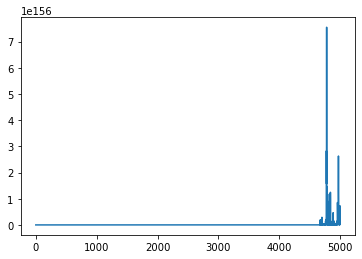

In [159]:
# reduction of loss
pd.Series(losses).plot()

In [157]:
predict(X_test,weights,bias)

array([[-2.00368009e+15, -3.23857650e+14,  5.95760206e+14]])

In [156]:
scaler_y.inverse_transform(y_test)

array([[12000.],
       [40000.],
       [33000.]])

# Mini Batch Gradient Descent

In [192]:
def predict(X,weights,bias):
    _y = sum(np.array(X * weights).T) + bias
    return scaler_y.inverse_transform([_y])

def Minibatch_Gradient_Descent(X_train,y_train,epochs,learning_rate=0.5):
    
    rows = X_train.shape[0]
    cols = X_train.shape[1]
    
    X_train = X_train.reset_index().drop('index',axis = 1)
    y = np.array(y_train).reshape(rows,)
    
    weights = np.ones(cols)
    bias = 0
    lr = learning_rate 
    
    losses = []
    for i in range(epochs):
        
        index = np.random.randint(0,rows,int(X_train.shape[0]*0.2))
        
        _y = sum(np.array(X_train.iloc[index,:] * weights).T) + bias
        loss = sum((_y - y[index])**2) / len(index)
        
        weight_slopes = np.array([sum((_y - y[index])*np.array(X_train.iloc[index,i])*2) for i in range(len(weights))]) / len(index)
        bias_slope = sum((_y - y[index])*2) / len(index)
        
        weights = weights - weight_slopes*lr
        bias = bias - bias_slope*lr
        
        losses.append(loss)
        print(f'Epoch: {i}--loss= {loss}--weights= {weights}--bias= {bias} --->')
        
    return (weights,bias,losses)

In [193]:
weights,bias,losses = Minibatch_Gradient_Descent(X_train,y_train,5000)

Epoch: 0--loss= 2.9867293697186543--weights= [-0.34745395 -0.11793985 -0.15272709]--bias= -1.5265467500868959 --->
Epoch: 1--loss= 5.581134088746768--weights= [0.85733579 1.06172004 1.03619031]--bias= 0.8354157199567451 --->
Epoch: 2--loss= 3.9878849086728576--weights= [ 0.24198799 -0.17631011 -0.13044202]--bias= -1.087617069160629 --->
Epoch: 3--loss= 2.0491376311612983--weights= [1.31300581 0.93070632 0.942286  ]--bias= 0.3438270758116313 --->
Epoch: 4--loss= 8.606491241537414--weights= [-1.62033076 -1.57572071 -1.50216115]--bias= -2.589509496433854 --->
Epoch: 5--loss= 26.120418861727806--weights= [-0.23442171  0.78588823  1.04319107]--bias= 2.5011949406581997 --->
Epoch: 6--loss= 8.061834708060708--weights= [-1.96586418 -0.82770629 -0.56907399]--bias= -0.24662557443480582 --->
Epoch: 7--loss= 7.061653061234003--weights= [-0.22250304  0.78076037  1.06055596]--bias= 2.1978193470545997 --->
Epoch: 8--loss= 5.160586518946973--weights= [-0.82536375 -0.22582765  0.10390166]--bias= -0.069

Epoch: 150--loss= 55.75639459568422--weights= [-0.10711177 -1.39829082 -1.59603699]--bias= -0.7998058974135835 --->
Epoch: 151--loss= 9.81968547207777--weights= [1.51112018 0.68049071 0.4918913 ]--bias= 2.3320865469821332 --->
Epoch: 152--loss= 10.876115300693208--weights= [ 0.59946984 -1.62398591 -1.69286492]--bias= -0.9450477843704106 --->
Epoch: 153--loss= 9.859261196154497--weights= [2.337638   0.38511236 0.21609163]--bias= 2.174569631486198 --->
Epoch: 154--loss= 15.479310855277136--weights= [-0.76146473 -2.33615903 -2.48745231]--bias= -1.6502831053906668 --->
Epoch: 155--loss= 45.332726437068146--weights= [5.97149349 3.21730286 3.12334621]--bias= 5.082675117936443 --->
Epoch: 156--loss= 44.72282717143211--weights= [5.97149349 0.76972555 0.73266886]--bias= -1.5002187836797276 --->
Epoch: 157--loss= 15.63363394480942--weights= [ 2.90658409 -1.77166929 -1.88263332]--bias= -4.932394264239313 --->
Epoch: 158--loss= 31.661310647278086--weights= [5.30107427 0.36372744 0.24329164]--bias=

Epoch: 294--loss= 1.700892368864836--weights= [-0.55882805 -0.28470635 -0.28676279]--bias= 1.5974579606614558 --->
Epoch: 295--loss= 0.2525264719338325--weights= [-0.85517781 -0.63924185 -0.61627315]--bias= 1.1360037600469086 --->
Epoch: 296--loss= 1.171218768231053--weights= [0.2270505  0.28502048 0.28558378]--bias= 2.218232071088373 --->
Epoch: 297--loss= 4.545728887253146--weights= [-1.07141469 -0.92576888 -0.92414772]--bias= 0.153703828208144 --->
Epoch: 298--loss= 5.020965399259769--weights= [0.66403033 0.30520362 0.39590328]--bias= 2.3784118105860244 --->
Epoch: 299--loss= 9.758570900855773--weights= [-1.72085401 -2.11701252 -1.95827493]--bias= -0.7400217272763325 --->
Epoch: 300--loss= 7.913926881430527--weights= [-1.72085401 -1.08453353 -0.94949819]--bias= 2.0236755374797633 --->
Epoch: 301--loss= 1.5829540623517444--weights= [-0.7409503  -0.24553077 -0.11162763]--bias= 3.1312840597975016 --->
Epoch: 302--loss= 3.2373620685130198--weights= [-2.54021739 -1.41439771 -1.31113902]-

Epoch: 441--loss= 0.29493107341426306--weights= [-0.3302053  -0.28370394 -0.69768837]--bias= 0.768629130460417 --->
Epoch: 442--loss= 0.37801123660572633--weights= [ 0.14848179  0.14231399 -0.27720259]--bias= 1.3767954655532697 --->
Epoch: 443--loss= 0.9021358665166129--weights= [ 0.14848179 -0.42537202 -0.83688248]--bias= 0.4364882309488597 --->
Epoch: 444--loss= 0.46949519823074937--weights= [ 0.64064701 -0.02703014 -0.44578911]--bias= 1.1176031402980353 --->
Epoch: 445--loss= 0.5758798342905607--weights= [ 0.11912915 -0.48023996 -0.90144217]--bias= 0.46975619705546834 --->
Epoch: 446--loss= 0.47138410749272397--weights= [ 0.45972898 -0.14028961 -0.55905779]--bias= 1.156309505966103 --->
Epoch: 447--loss= 0.2579151974108943--weights= [ 0.29688464 -0.45183148 -0.85182167]--bias= 0.6793446432556522 --->
Epoch: 448--loss= 0.17505791311241037--weights= [ 0.71528387 -0.08229639 -0.50315565]--bias= 1.0977438702057154 --->
Epoch: 449--loss= 0.6390507868218159--weights= [ 0.08409771 -0.63728

Epoch: 587--loss= 0.00044956653771115667--weights= [ 0.31329317 -0.44789249 -0.66965045]--bias= 1.0587550879106513 --->
Epoch: 588--loss= 0.008819351254235682--weights= [ 0.24693914 -0.505182   -0.72363986]--bias= 0.9950122852583446 --->
Epoch: 589--loss= 0.012111763095935191--weights= [ 0.2934285  -0.43269084 -0.65369528]--bias= 1.1039085427922914 --->
Epoch: 590--loss= 0.028001514926724435--weights= [ 0.20629279 -0.55890293 -0.77967555]--bias= 0.9367220644657532 --->
Epoch: 591--loss= 0.06460080771400721--weights= [ 0.27359466 -0.42720054 -0.65282908]--bias= 1.1904150023409108 --->
Epoch: 592--loss= 0.022063664260905266--weights= [ 0.23566045 -0.50420927 -0.72708069]--bias= 1.0419117762369083 --->
Epoch: 593--loss= 0.005655547275551959--weights= [ 0.24664583 -0.49724216 -0.72025795]--bias= 1.063882535789438 --->
Epoch: 594--loss= 0.0021966473310844267--weights= [ 0.24664583 -0.4771736  -0.7004914 ]--bias= 1.1106187603003586 --->
Epoch: 595--loss= 0.0017438859331315622--weights= [ 0.2

Epoch: 730--loss= 0.012717909408370857--weights= [ 0.08179427 -0.56706802 -0.72935342]--bias= 0.9194826921214844 --->
Epoch: 731--loss= 0.08141827810886988--weights= [ 0.27833074 -0.38515715 -0.5579672 ]--bias= 1.1616541907868068 --->
Epoch: 732--loss= 0.13238694180242938--weights= [ 0.0129306  -0.66452581 -0.82785922]--bias= 0.798803574183456 --->
Epoch: 733--loss= 0.16818967449202044--weights= [ 0.0129306  -0.45360396 -0.62143695]--bias= 1.2088254885410528 --->
Epoch: 734--loss= 0.039223942677687605--weights= [ 0.0129306  -0.50087388 -0.6661065 ]--bias= 1.0156258678307097 --->
Epoch: 735--loss= 0.022539979133005403--weights= [ 0.06275051 -0.42933149 -0.59797065]--bias= 1.1518975727167529 --->
Epoch: 736--loss= 0.028751154926913016--weights= [ 0.00933436 -0.52520395 -0.68733494]--bias= 0.9906369984968277 --->
Epoch: 737--loss= 0.10557353582827153--weights= [ 0.33424539 -0.24779885 -0.41657576]--bias= 1.3155480197116676 --->
Epoch: 738--loss= 0.5074743786497172--weights= [ 0.14295215 -

Epoch: 868--loss= 62.06104487658269--weights= [-2.0419249  -1.61740638 -1.21025722]--bias= 4.534726291292369 --->
Epoch: 869--loss= 4.1858746170200725--weights= [-2.18097317 -2.20175195 -1.7829564 ]--bias= 2.9556770200600004 --->
Epoch: 870--loss= 5.407932666031031--weights= [-0.71026293 -1.03702099 -0.67994986]--bias= 3.6908753630160054 --->
Epoch: 871--loss= 3.437804493319909--weights= [-1.31644504 -2.15790931 -1.76636005]--bias= 1.9221763743920088 --->
Epoch: 872--loss= 0.9493943405229327--weights= [-1.00073742 -1.74712841 -1.3128011 ]--bias= 2.8292942801411174 --->
Epoch: 873--loss= 0.15236070978276922--weights= [-0.76138234 -1.60413179 -1.16324312]--bias= 3.0386131509172896 --->
Epoch: 874--loss= 0.5676633954005736--weights= [-0.87701288 -2.09705152 -1.63738245]--bias= 2.327404145936276 --->
Epoch: 875--loss= 0.39390599882262645--weights= [-0.87701288 -2.16504924 -1.69846628]--bias= 1.9098634431491315 --->
Epoch: 876--loss= 3.624252259109097--weights= [ 0.62399451 -0.91764392 -0.4

Epoch: 1012--loss= 0.6599375730995568--weights= [-0.12517781 -1.37094127 -0.15263954]--bias= 1.6661328329037335 --->
Epoch: 1013--loss= 0.17593701106474366--weights= [-0.12517781 -1.65567636 -0.43227185]--bias= 1.2466843723454146 --->
Epoch: 1014--loss= 0.1092699618902127--weights= [-0.01033914 -1.56468339 -0.32466602]--bias= 1.4329646804328142 --->
Epoch: 1015--loss= 0.004408736289976411--weights= [-0.01033914 -1.57509661 -0.33467218]--bias= 1.3976982102335478 --->
Epoch: 1016--loss= 0.03366779290391473--weights= [ 0.04854113 -1.47537623 -0.23948242]--bias= 1.569922976509317 --->
Epoch: 1017--loss= 0.028862062077050516--weights= [ 0.21842951 -1.32532883 -0.09790877]--bias= 1.7398113577396135 --->
Epoch: 1018--loss= 0.38483168106764637--weights= [-0.11899322 -1.73479941 -0.50971637]--bias= 1.1220999515486523 --->
Epoch: 1019--loss= 0.874939624660223--weights= [ 0.467996   -1.04372078  0.18265272]--bias= 2.013906283131572 --->
Epoch: 1020--loss= 1.1952288235562476--weights= [ 0.17758128

Epoch: 1159--loss= 0.035718545945644616--weights= [-0.25145056 -1.0278853   0.16878477]--bias= 1.133009455984648 --->
Epoch: 1160--loss= 0.021443540085755077--weights= [-0.19485836 -0.99424589  0.2014056 ]--bias= 1.160522996791005 --->
Epoch: 1161--loss= 0.030446262867599765--weights= [-0.24330597 -1.04642578  0.15019515]--bias= 0.9986030976143234 --->
Epoch: 1162--loss= 0.047024490981580104--weights= [-0.08131381 -0.90663684  0.29016491]--bias= 1.1705478440699237 --->
Epoch: 1163--loss= 0.04876004307915453--weights= [-0.25477317 -1.05126243  0.13852218]--bias= 0.9545289277742939 --->
Epoch: 1164--loss= 0.11035076121197791--weights= [ 0.06872009 -0.79451009  0.38743524]--bias= 1.278022185127475 --->
Epoch: 1165--loss= 0.3688213988581856--weights= [-0.40956712 -1.12901772  0.03110603]--bias= 0.6873217673940684 --->
Epoch: 1166--loss= 0.2015017415614618--weights= [-0.26624256 -0.82933869  0.31308547]--bias= 1.1102909258838305 --->
Epoch: 1167--loss= 0.00441474921502715--weights= [-0.2994

Epoch: 1295--loss= 0.0005352622504861026--weights= [ 0.21187865 -1.10133557  0.09303818]--bias= 0.9472733174474843 --->
Epoch: 1296--loss= 0.003798928296435205--weights= [ 0.19721161 -1.10629899  0.08959869]--bias= 0.9501723642895413 --->
Epoch: 1297--loss= 0.002234445258061105--weights= [ 0.20314851 -1.08483538  0.11099281]--bias= 0.9890026699307664 --->
Epoch: 1298--loss= 0.0011911030031506913--weights= [ 0.20314851 -1.07970217  0.11610712]--bias= 0.9983894557079112 --->
Epoch: 1299--loss= 0.010056660411537872--weights= [ 0.17872242 -1.11867895  0.08031174]--bias= 0.9495372680233061 --->
Epoch: 1300--loss= 0.0007252368837296879--weights= [ 0.17872242 -1.11376468  0.08480011]--bias= 0.9764674905201531 --->
Epoch: 1301--loss= 0.001964236738380295--weights= [ 0.17872242 -1.13518119  0.06377772]--bias= 0.9443171021704315 --->
Epoch: 1302--loss= 0.009753096683813745--weights= [ 0.14324158 -1.13759642  0.06017282]--bias= 0.9689832397818454 --->
Epoch: 1303--loss= 0.01231132880878112--weigh

Epoch: 1416--loss= 0.010198205407221087--weights= [ 0.09814344 -1.15473389  0.13191228]--bias= 0.8760566148853157 --->
Epoch: 1417--loss= 0.02914942024430966--weights= [ 0.15326729 -1.09827775  0.19523531]--bias= 1.035499387875829 --->
Epoch: 1418--loss= 0.00025759731194038415--weights= [ 0.14686917 -1.10394736  0.18883719]--bias= 1.022703152049988 --->
Epoch: 1419--loss= 0.017151649437507795--weights= [ 0.14686917 -1.16851017  0.12545023]--bias= 0.9249992424988513 --->
Epoch: 1420--loss= 0.013959817336796462--weights= [ 0.14686917 -1.11984499  0.17328998]--bias= 1.042426809809922 --->
Epoch: 1421--loss= 0.005816248349561995--weights= [ 0.10256519 -1.17187261  0.12099728]--bias= 0.9673774001705286 --->
Epoch: 1422--loss= 0.025137011092778386--weights= [ 0.21921589 -1.06124049  0.22515197]--bias= 1.1257027053507354 --->
Epoch: 1423--loss= 0.078222237119852--weights= [ 0.21921589 -1.22743894  0.06139378]--bias= 0.8550386819665564 --->
Epoch: 1424--loss= 0.04134502888301704--weights= [ 0.

Epoch: 1564--loss= 0.06887206800635078--weights= [-0.03664037 -1.25401726  0.04636298]--bias= 0.9084022368525727 --->
Epoch: 1565--loss= 0.028689513437203357--weights= [-0.03664037 -1.15990395  0.13933691]--bias= 1.073309761501045 --->
Epoch: 1566--loss= 0.000501343192054756--weights= [-0.04609215 -1.17040171  0.12880179]--bias= 1.051156191514358 --->
Epoch: 1567--loss= 0.007922334055054409--weights= [-0.01463807 -1.14264722  0.16089973]--bias= 1.115995908382714 --->
Epoch: 1568--loss= 0.028063998470428623--weights= [-0.00434866 -1.21087138  0.09341879]--bias= 1.019919212747253 --->
Epoch: 1569--loss= 0.002606194995024093--weights= [ 0.0095762  -1.20633724  0.09667384]--bias= 1.0248017817928057 --->
Epoch: 1570--loss= 0.03244927596685048--weights= [ 0.14929388 -1.08967342  0.21960008]--bias= 1.203488555685332 --->
Epoch: 1571--loss= 0.05353192429165411--weights= [ 0.09820027 -1.15699572  0.14721242]--bias= 0.9735369693799452 --->
Epoch: 1572--loss= 0.0028787587331775316--weights= [ 0.0

Epoch: 1713--loss= 110.4656699426298--weights= [  0.04544595  -4.86722526 -18.23729733]--bias= 4.081356577307707 --->
Epoch: 1714--loss= 118.88676689859957--weights= [  7.74891919   1.54440659 -11.76506238]--bias= 12.100873343775762 --->
Epoch: 1715--loss= 92.85522010357387--weights= [  7.74891919  -0.21401336 -13.37108594]--bias= 2.464731994481747 --->
Epoch: 1716--loss= 8.28546852194999--weights= [  8.49647719   1.34019767 -11.9139843 ]--bias= 5.3409209144480085 --->
Epoch: 1717--loss= 11.652683379115688--weights= [  6.09295629  -0.6706455  -13.80575523]--bias= 3.1597263159127706 --->
Epoch: 1718--loss= 4.208932022349889--weights= [  6.51181953   0.1820435  -12.9921093 ]--bias= 5.1818008709257795 --->
Epoch: 1719--loss= 5.3911331700837355--weights= [  5.11515294  -0.2905954  -13.49168559]--bias= 4.648203812905784 --->
Epoch: 1720--loss= 0.23296619102477545--weights= [  5.003665    -0.25235804 -13.45848645]--bias= 4.859289171985598 --->
Epoch: 1721--loss= 3.184237082962053--weights= [

Epoch: 1859--loss= 2.2104888941025225--weights= [-6.81375082 11.47536503  1.6479341 ]--bias= -2.586683987241814 --->
Epoch: 1860--loss= 19.252432183873996--weights= [-6.81375082  9.20281548 -0.58173283]--bias= -6.231935101160996 --->
Epoch: 1861--loss= 5.718690120468567--weights= [-6.81375082 10.40723228  0.61395631]--bias= -3.8405568122931375 --->
Epoch: 1862--loss= 7.612822758120829--weights= [-5.8737316  10.02203666  0.25756393]--bias= -4.6101501915871115 --->
Epoch: 1863--loss= 3.901106591412656--weights= [-5.8737316   9.59786272 -0.16220279]--bias= -4.794173481023088 --->
Epoch: 1864--loss= 12.673259412792921--weights= [-3.13364225 11.60948747  1.85855793]--bias= -1.7630323910293053 --->
Epoch: 1865--loss= 39.35529556285065--weights= [-9.39686624  6.25018464 -3.3607954 ]--bias= -8.026256389105097 --->
Epoch: 1866--loss= 76.80323933888133--weights= [-6.71952192 12.23699214  2.28841246]--bias= 0.44755540257859394 --->
Epoch: 1867--loss= 59.192208627790805--weights= [-7.75227522  7.7

Epoch: 2008--loss= 0.6114473646947647--weights= [-2.12959089  6.93239952 -2.93013603]--bias= 0.07183332849036661 --->
Epoch: 2009--loss= 1.6738281349988096--weights= [-2.5780901   6.1608859  -3.70255896]--bias= -1.174013057985309 --->
Epoch: 2010--loss= 2.2484872364262816--weights= [-1.53939464  7.12488137 -2.73049541]--bias= 0.0776504095899 --->
Epoch: 2011--loss= 0.9083529753772712--weights= [-2.03407225  6.64650732 -3.21284032]--bias= -0.8747067284264441 --->
Epoch: 2012--loss= 0.4831733842396549--weights= [-2.03327859  6.73690063 -3.13025994]--bias= -0.38239902435867096 --->
Epoch: 2013--loss= 0.7456124055308755--weights= [-1.83898833  6.66704238 -3.17145396]--bias= -0.4647870697115006 --->
Epoch: 2014--loss= 1.5014093562248096--weights= [-1.82925705  6.08939938 -3.73919836]--bias= -1.3115380258685456 --->
Epoch: 2015--loss= 0.35862959169472897--weights= [-1.68442934  6.45428599 -3.39164853]--bias= -0.7129901754322618 --->
Epoch: 2016--loss= 1.095646143413358--weights= [-1.38799638

Epoch: 2146--loss= 7.414256825858708--weights= [-3.29485238  5.33337666  2.52297727]--bias= -0.15201702486472612 --->
Epoch: 2147--loss= 3.0756738914924173--weights= [-3.71547465  4.57254733  1.79864744]--bias= -1.9043842624522842 --->
Epoch: 2148--loss= 1.278215405279652--weights= [-3.53138808  4.87709801  2.0817127 ]--bias= -0.942338932645336 --->
Epoch: 2149--loss= 8.160956973229325--weights= [-4.01723496  2.97274246  0.25327867]--bias= -3.684989979942461 --->
Epoch: 2150--loss= 23.105269472258495--weights= [-1.61588438  5.27631935  2.65462925]--bias= 1.1177111811487728 --->
Epoch: 2151--loss= 20.001803175511974--weights= [-3.78694372  2.70781336  0.05753868]--bias= -3.35278350937141 --->
Epoch: 2152--loss= 23.077625383003518--weights= [-0.09804993  6.01520413  3.31478622]--bias= 1.4351265705280842 --->
Epoch: 2153--loss= 44.06314836688743--weights= [-1.50486191  1.96559748 -0.59669645]--bias= -5.135503429403114 --->
Epoch: 2154--loss= 21.977136734459236--weights= [-1.50486191  4.70

Epoch: 2293--loss= 2.088473859172491--weights= [-3.77334708  2.31007162  0.28887443]--bias= 0.24478582826265827 --->
Epoch: 2294--loss= 0.005074682195352322--weights= [-3.77334708  2.32307104  0.30074723]--bias= 0.31602263192026436 --->
Epoch: 2295--loss= 2.3370452017747083--weights= [-2.24701047  3.62408306  1.5726944 ]--bias= 1.8423592422467652 --->
Epoch: 2296--loss= 12.753859841434984--weights= [-3.27837687  1.63374092 -0.28803758]--bias= -1.6771039096577065 --->
Epoch: 2297--loss= 13.221541001229934--weights= [-0.4096089   4.01224807  2.05588193]--bias= 1.8387753574060566 --->
Epoch: 2298--loss= 25.961224765613228--weights= [-0.4096089   0.96724464 -0.94633626]--bias= -3.21254095430257 --->
Epoch: 2299--loss= 14.234111043127815--weights= [1.51148907 3.59626853 1.58011074]--bias= 0.559621064243073 --->
Epoch: 2300--loss= 37.906055697117694--weights= [-4.64407441 -1.66425962 -3.54952549]--bias= -5.595942410096493 --->
Epoch: 2301--loss= 143.26028195364773--weights= [2.80197249 5.857

Epoch: 2441--loss= 17.909041973334514--weights= [-3.54816097 -1.67477326 -3.37943452]--bias= 6.4341956862483745 --->
Epoch: 2442--loss= 2.511195001832589--weights= [-3.11539004 -1.33182041 -3.08274456]--bias= 6.483251739306485 --->
Epoch: 2443--loss= 2.4171641993025315--weights= [-3.30793244 -1.49039978 -3.33054409]--bias= 5.766624086120274 --->
Epoch: 2444--loss= 4.585415122496734--weights= [-3.56588309 -2.48227694 -4.30028008]--bias= 3.827152124768288 --->
Epoch: 2445--loss= 10.469636730260222--weights= [-1.27823245 -0.97680956 -2.75599034]--bias= 6.153181372641538 --->
Epoch: 2446--loss= 5.504702373705166--weights= [-2.74169356 -2.40595001 -4.10029759]--bias= 3.9411823544689555 --->
Epoch: 2447--loss= 11.186913174478457--weights= [-0.1342204  -0.17196291 -1.8697681 ]--bias= 6.8944666086344775 --->
Epoch: 2448--loss= 22.700576451977554--weights= [-4.89873259 -4.38003572 -5.84019493]--bias= 2.129954414088476 --->
Epoch: 2449--loss= 67.84516005327518--weights= [ 1.58237829  0.47467328 

Epoch: 2565--loss= 0.15228248922370724--weights= [ 0.6330981   0.34630184 -1.5347252 ]--bias= 1.378681655975105 --->
Epoch: 2566--loss= 0.08379999969939561--weights= [ 0.6330981   0.24699039 -1.6312193 ]--bias= 1.0891993599717127 --->
Epoch: 2567--loss= 0.03005020221387451--weights= [ 0.57408893  0.17306855 -1.69885903]--bias= 1.0042985356757843 --->
Epoch: 2568--loss= 0.03937910458850993--weights= [ 0.62354869  0.24981125 -1.61622551]--bias= 1.202739314051898 --->
Epoch: 2569--loss= 0.06951162683897777--weights= [ 0.44152192  0.07233248 -1.79476443]--bias= 0.9804376314699698 --->
Epoch: 2570--loss= 0.07683725251118807--weights= [ 0.44152192  0.21005852 -1.66007867]--bias= 1.2166680280318922 --->
Epoch: 2571--loss= 0.026565118767549654--weights= [ 0.37821071  0.1402648  -1.7288885 ]--bias= 1.0570539084851591 --->
Epoch: 2572--loss= 0.0230668823606298--weights= [ 0.37821071  0.2123044  -1.65808481]--bias= 1.15996420308764 --->
Epoch: 2573--loss= 0.0054200716262934765--weights= [ 0.40391

Epoch: 2666--loss= 3.6169763183358024--weights= [-2.00443977 -0.0734215  -1.91128835]--bias= 0.8743787431874073 --->
Epoch: 2667--loss= 0.3376980928403284--weights= [-2.00443977  0.23500967 -1.6092526 ]--bias= 1.4485159548403337 --->
Epoch: 2668--loss= 2.4145285169359543--weights= [-0.77852804  1.29762235 -0.55205388]--bias= 2.888061356597225 --->
Epoch: 2669--loss= 5.488587668579992--weights= [-1.89219578  0.15341165 -1.70329646]--bias= 0.548001346773531 --->
Epoch: 2670--loss= 5.66225159044287--weights= [-0.01441147  2.04844038  0.07195908]--bias= 2.8466562297012716 --->
Epoch: 2671--loss= 12.068646780370962--weights= [-2.14459727  0.06818329 -1.9070906 ]--bias= -0.506898626708741 --->
Epoch: 2672--loss= 13.658765730509321--weights= [0.73878038 2.55038067 0.5255002 ]--bias= 3.141987560650957 --->
Epoch: 2673--loss= 27.255450662919507--weights= [-3.35119236 -0.86104011 -3.05606797]--bias= -1.9875304950843464 --->
Epoch: 2674--loss= 45.672934196185714--weights= [1.10734549 3.1302825  0

Epoch: 2809--loss= 0.011788314575130625--weights= [ 0.13383218 -0.61138029 -0.58129193]--bias= 1.1915498853710766 --->
Epoch: 2810--loss= 0.004113899667161615--weights= [ 0.12619237 -0.64064378 -0.6100112 ]--bias= 1.1392045575307665 --->
Epoch: 2811--loss= 0.00877773617034507--weights= [ 0.19665648 -0.57891757 -0.54742076]--bias= 1.2328907331270529 --->
Epoch: 2812--loss= 0.0652989111170124--weights= [ 0.19665648 -0.69023054 -0.65516891]--bias= 0.9774068486045311 --->
Epoch: 2813--loss= 0.03545146257683175--weights= [ 0.19665648 -0.60963519 -0.57578877]--bias= 1.1652014355031286 --->
Epoch: 2814--loss= 0.017591503435960398--weights= [ 0.12311088 -0.69966105 -0.65937888]--bias= 1.047051608851735 --->
Epoch: 2815--loss= 0.01069472129252944--weights= [ 0.14743279 -0.64577835 -0.60874973]--bias= 1.1502952402453916 --->
Epoch: 2816--loss= 0.012707211693875163--weights= [ 0.18025113 -0.63004828 -0.59350777]--bias= 1.1104736301095972 --->
Epoch: 2817--loss= 0.0037113941320650887--weights= [ 0

Epoch: 2948--loss= 0.05372501683913283--weights= [ 0.06088675 -0.66379992 -0.4397829 ]--bias= 1.129414881090675 --->
Epoch: 2949--loss= 0.007723818738581569--weights= [ 0.02156274 -0.68616099 -0.46098316]--bias= 1.1051381136825043 --->
Epoch: 2950--loss= 0.007868253666591862--weights= [ 0.04441135 -0.66473675 -0.4353876 ]--bias= 1.159076176032249 --->
Epoch: 2951--loss= 0.015245237214616942--weights= [ 0.00692337 -0.73426352 -0.50028326]--bias= 1.039365184624506 --->
Epoch: 2952--loss= 0.09076882019992166--weights= [ 0.30818072 -0.47688078 -0.24923546]--bias= 1.34062254162812 --->
Epoch: 2953--loss= 0.38104052854007264--weights= [-0.05892232 -0.92003539 -0.6732178 ]--bias= 0.7373932198268407 --->
Epoch: 2954--loss= 0.39859142335606584--weights= [ 0.12616349 -0.63718309 -0.40495301]--bias= 1.357101775870945 --->
Epoch: 2955--loss= 0.16716886492023458--weights= [ 0.01889989 -0.82757327 -0.58027289]--bias= 0.9487640672015305 --->
Epoch: 2956--loss= 0.08353843732430993--weights= [ 0.175873

Epoch: 3094--loss= 0.002944542298740648--weights= [-0.03751942 -0.72679827 -0.04085663]--bias= 0.9795537747199621 --->
Epoch: 3095--loss= 0.030131701093278375--weights= [-0.03751942 -0.81329781 -0.12576986]--bias= 0.8471422399641233 --->
Epoch: 3096--loss= 0.05925258881999085--weights= [ 0.11208749 -0.65196421  0.02727326]--bias= 1.0818612400845937 --->
Epoch: 3097--loss= 0.1148983656231301--weights= [ 0.06640847 -0.85106761 -0.16613357]--bias= 0.7689114855275601 --->
Epoch: 3098--loss= 0.0779333811719361--weights= [ 0.23666439 -0.68246603 -0.00760398]--bias= 1.0390654189448365 --->
Epoch: 3099--loss= 0.07772039397433464--weights= [ 0.19453507 -0.84834121 -0.16854347]--bias= 0.7765915231607243 --->
Epoch: 3100--loss= 0.02636602583995943--weights= [ 0.19453507 -0.78807583 -0.11056254]--bias= 0.9355704716572002 --->
Epoch: 3101--loss= 0.0024165855418247554--weights= [ 0.16127368 -0.81042447 -0.13323128]--bias= 0.9124072490895747 --->
Epoch: 3102--loss= 0.007299163122790049--weights= [ 0.

Epoch: 3241--loss= 4.207665696349701--weights= [-0.50744435 -1.23007005 -0.65037008]--bias= 0.2477396614803955 --->
Epoch: 3242--loss= 2.954016459029819--weights= [ 0.57945879 -0.08356704  0.43662817]--bias= 1.8783796838013085 --->
Epoch: 3243--loss= 2.141467330126245--weights= [ 0.14934225 -0.64688351 -0.08933732]--bias= 0.4430529498314322 --->
Epoch: 3244--loss= 0.21443161135530608--weights= [ 0.27260797 -0.40698611  0.14167585]--bias= 0.9050792943075567 --->
Epoch: 3245--loss= 0.3804340219281766--weights= [-0.19794833 -0.82824384 -0.26886503]--bias= 0.2892679650144746 --->
Epoch: 3246--loss= 0.7290289322790513--weights= [ 0.05377525 -0.333763    0.20502508]--bias= 1.1259649225979094 --->
Epoch: 3247--loss= 0.1280864270867525--weights= [-0.04556026 -0.44792751  0.07956326]--bias= 0.7705359994699799 --->
Epoch: 3248--loss= 0.05501625386220182--weights= [-0.11050308 -0.59371487 -0.06547358]--bias= 0.5529807358337537 --->
Epoch: 3249--loss= 0.2170597927875133--weights= [ 0.22735143 -0.3

Epoch: 3387--loss= 14309.501880000103--weights= [-103.38236561 -268.19519318 -305.49521636]--bias= 302.51224827478563 --->
Epoch: 3388--loss= 16142.541427903361--weights= [ -13.82249967 -213.58601519 -249.33480344]--bias= 384.9797854615374 --->
Epoch: 3389--loss= 51937.37138922082--weights= [ -13.82249967 -291.76990499 -325.30071055]--bias= 157.0820641275565 --->
Epoch: 3390--loss= 47505.89100420404--weights= [  28.31990159 -159.26858902 -197.13759456]--bias= 370.39793874776944 --->
Epoch: 3391--loss= 36366.08968687392--weights= [ -23.05387873 -244.41419365 -281.50730978]--bias= 194.34946356440975 --->
Epoch: 3392--loss= 7883.283999523426--weights= [  21.34005104 -197.10387434 -237.11338002]--bias= 283.13732309218204 --->
Epoch: 3393--loss= 2446.5267219161146--weights= [   5.6797013  -213.13240889 -252.19358983]--bias= 251.81662362060743 --->
Epoch: 3394--loss= 6285.303452059266--weights= [   5.6797013  -208.47080644 -247.44718232]--bias= 235.4519230246046 --->
Epoch: 3395--loss= 11209

Epoch: 3534--loss= 68.46620456934185--weights= [ 11.86543454 -85.58669348   8.33478512]--bias= 49.761756621504354 --->
Epoch: 3535--loss= 95.71064631144202--weights= [  9.62746582 -88.2537462    5.9016508 ]--bias= 44.11482556318296 --->
Epoch: 3536--loss= 106.69646113609582--weights= [ 16.85463121 -82.82478774  11.3960105 ]--bias= 50.28543471210283 --->
Epoch: 3537--loss= 406.5739708695732--weights= [ 16.85463121 -90.57495223   3.79248972]--bias= 30.916170971394166 --->
Epoch: 3538--loss= 291.51066587014134--weights= [ 28.52396539 -80.96373785  13.4536551 ]--bias= 42.2058265400203 --->
Epoch: 3539--loss= 80.75868762831358--weights= [ 23.45029636 -87.37175601   7.31266616]--bias= 33.30629468249843 --->
Epoch: 3540--loss= 240.6438873991039--weights= [ 23.45029636 -80.99759897  13.5816827 ]--bias= 41.44152713183413 --->
Epoch: 3541--loss= 33.66202188350816--weights= [ 21.25721998 -84.6808001   10.02052258]--bias= 35.78125780503655 --->
Epoch: 3542--loss= 69.83332237135579--weights= [ 19.1

Epoch: 3655--loss= 21.587306232855415--weights= [ -0.13679325 -44.63119595  40.66390745]--bias= -0.7500255048748494 --->
Epoch: 3656--loss= 13.676418489402531--weights= [  1.93033178 -42.37673235  42.92038672]--bias= 2.9187247482006535 --->
Epoch: 3657--loss= 6.507689552888271--weights= [ -0.05660954 -44.22935721  41.17533758]--bias= 0.39619522336463664 --->
Epoch: 3658--loss= 10.45446839803776--weights= [  1.56005898 -42.50648419  42.7920061 ]--bias= 3.629532260859763 --->
Epoch: 3659--loss= 9.13042174967995--weights= [ -1.4615998  -45.1752485   40.27395712]--bias= 0.6078734863321111 --->
Epoch: 3660--loss= 18.760429856292266--weights= [  2.83032467 -41.96006893  43.54147846]--bias= 4.89979795748306 --->
Epoch: 3661--loss= 16.237510382175596--weights= [  2.83032467 -43.04033028  42.51161841]--bias= 0.881705328064661 --->
Epoch: 3662--loss= 0.022707087814623234--weights= [  2.83032467 -42.95860284  42.59199761]--bias= 1.007687076536288 --->
Epoch: 3663--loss= 0.6229592318980225--weight

Epoch: 3746--loss= 5.231108279110085--weights= [ -0.97000031 -42.18377689  39.86927723]--bias= -0.4632933845057656 --->
Epoch: 3747--loss= 3.742277966783552--weights= [ -0.99633114 -41.27857277  40.7542009 ]--bias= 0.8509267069686599 --->
Epoch: 3748--loss= 3.2982427482478798--weights= [ -0.35444926 -40.33439938  41.626414  ]--bias= 2.1674316569480867 --->
Epoch: 3749--loss= 4.568109224248918--weights= [ -1.93994077 -41.4307608   40.51380638]--bias= 0.4985202329355114 --->
Epoch: 3750--loss= 1.100237163712321--weights= [ -2.24712149 -41.41325375  40.48365642]--bias= 0.2997049273658456 --->
Epoch: 3751--loss= 13.24718549152137--weights= [  0.072393   -39.35987536  42.38038592]--bias= 2.4020239756878645 --->
Epoch: 3752--loss= 5.829892319318301--weights= [ -1.80745282 -41.11297845  40.72908921]--bias= 0.013627010540413487 --->
Epoch: 3753--loss= 0.8037374328611184--weights= [ -1.80745282 -40.57874236  41.25598756]--bias= 0.9079665863159707 --->
Epoch: 3754--loss= 5.652050721294124--weigh

Epoch: 3873--loss= 5.238223721357545--weights= [ -1.6282882  -37.51160977  40.03324203]--bias= -0.7584082866909545 --->
Epoch: 3874--loss= 5.516176729578163--weights= [  0.15558768 -35.61972786  41.80122631]--bias= 1.5883096722693255 --->
Epoch: 3875--loss= 17.20726423709928--weights= [ -0.5857706  -38.12780836  39.37263706]--bias= -2.4252533272288535 --->
Epoch: 3876--loss= 8.287363426733204--weights= [  0.35868052 -37.18520045  40.30281204]--bias= 0.32244314542862895 --->
Epoch: 3877--loss= 3.0074165455833266--weights= [  0.35868052 -38.36242463  39.14668507]--bias= -1.411747312849621 --->
Epoch: 3878--loss= 8.43178937151938--weights= [  1.13795137 -36.99225065  40.40850091]--bias= 1.4835226528948233 --->
Epoch: 3879--loss= 28.290511348952585--weights= [ -4.17895338 -40.92471635  36.40873609]--bias= -3.8333821021394234 --->
Epoch: 3880--loss= 36.45948321465733--weights= [ -2.66463105 -39.07123182  38.42464073]--bias= 2.2047563907636905 --->
Epoch: 3881--loss= 0.7278605349858244--weig

Epoch: 4012--loss= 45.04122285608658--weights= [ -4.11546715 -36.03777412  32.80606927]--bias= -4.039078167225815 --->
Epoch: 4013--loss= 109.51850306951334--weights= [  6.34180598 -28.29293213  40.68276555]--bias= 6.418194967023721 --->
Epoch: 4014--loss= 356.80158706118897--weights= [ -8.35340808 -43.52079032  26.4361326 ]--bias= -12.278261556195757 --->
Epoch: 4015--loss= 548.0775122441037--weights= [ -1.59134857 -33.03940794  36.38038145]--bias= 10.79242547934784 --->
Epoch: 4016--loss= 101.66775783657368--weights= [ -9.14573466 -41.13271839  28.82075571]--bias= 0.7094314053064839 --->
Epoch: 4017--loss= 252.26505338291298--weights= [  3.34143308 -30.14705255  39.55512192]--bias= 15.166957684867194 --->
Epoch: 4018--loss= 337.22613609161345--weights= [  3.34143308 -38.6383034   31.3130936 ]--bias= -2.998263568079901 --->
Epoch: 4019--loss= 20.344979912865593--weights= [  4.09771788 -37.47450388  32.53737126]--bias= 1.3222631549713615 --->
Epoch: 4020--loss= 3.3542985377671726--weig

Epoch: 4155--loss= 4164.468463018832--weights= [71.32682451 12.47593769 68.53751746]--bias= 7.054662882165623 --->
Epoch: 4156--loss= 8887.735967748762--weights= [  5.41640997 -32.16372021  22.9331995 ]--bias= -68.84000122366169 --->
Epoch: 4157--loss= 5386.35907984366--weights= [42.10917621 13.99425982 65.82147467]--bias= 4.545531247019994 --->
Epoch: 4158--loss= 5895.277226676294--weights= [ -7.52567839 -29.33079963  21.73134636]--bias= -67.0897738538271 --->
Epoch: 4159--loss= 4915.012636829315--weights= [ -7.52567839 -10.86884906  39.29930933]--bias= 3.0155982455661245 --->
Epoch: 4160--loss= 270.27545055867154--weights= [-23.83851188 -23.60978592  26.8945757 ]--bias= -13.29723523964708 --->
Epoch: 4161--loss= 408.5045455614345--weights= [-17.59575468 -15.68786262  34.29640584]--bias= 6.142716815078636 --->
Epoch: 4162--loss= 125.99211930567881--weights= [-18.97385162 -20.90519651  29.1967684 ]--bias= -4.056558075372358 --->
Epoch: 4163--loss= 2.906270161651996--weights= [-18.97385

Epoch: 4301--loss= 5.031567614015983--weights= [  1.00448488 -24.20151964  33.48888673]--bias= -3.617797115444419 --->
Epoch: 4302--loss= 6.300528120619085--weights= [  1.00448488 -23.6566439   34.00107966]--bias= -1.2716268454155295 --->
Epoch: 4303--loss= 1.0312762072010841--weights= [  1.00448488 -23.80649123  33.85172054]--bias= -1.5428541042620754 --->
Epoch: 4304--loss= 12.480925290306436--weights= [ -0.22514821 -25.01609997  32.47584849]--bias= -4.440837159935977 --->
Epoch: 4305--loss= 4.188192443373176--weights= [ -0.23364609 -24.52716386  32.95112502]--bias= -3.002260750036377 --->
Epoch: 4306--loss= 4.749700928301041--weights= [ -1.89098212 -25.97955882  31.48337001]--bias= -5.179446730239597 --->
Epoch: 4307--loss= 14.19321655565904--weights= [  0.80953502 -23.39571657  33.97876286]--bias= -1.4363574521236835 --->
Epoch: 4308--loss= 37.8980246304922--weights= [ -3.2255589  -27.54644506  29.79963248]--bias= -7.104555588944355 --->
Epoch: 4309--loss= 77.90438660827562--weight

Epoch: 4445--loss= 2.0976693678154295--weights= [ -0.85779358 -27.86692391  26.60277002]--bias= 3.018797855563485 --->
Epoch: 4446--loss= 5.56692031727973--weights= [ -2.16348451 -28.97285801  25.3823644 ]--bias= 0.9191278409614485 --->
Epoch: 4447--loss= 9.719104327703715--weights= [-7.91663765e-03 -2.71106733e+01  2.72556051e+01]--bias= 3.5363008481403333 --->
Epoch: 4448--loss= 4.774305689010134--weights= [ -1.01352208 -28.21288548  26.22210192]--bias= 1.3577032744649062 --->
Epoch: 4449--loss= 0.1600787777118738--weights= [ -1.01352208 -28.01521989  26.41493302]--bias= 1.7241989685605312 --->
Epoch: 4450--loss= 0.07521057405130335--weights= [ -1.01352208 -28.13338695  26.29842545]--bias= 1.4542359639486908 --->
Epoch: 4451--loss= 0.010561975056455274--weights= [ -1.01352208 -28.09399065  26.33707377]--bias= 1.5528077154210416 --->
Epoch: 4452--loss= 1.077943900476394--weights= [ -0.41403883 -27.56135512  26.85144891]--bias= 2.4964498853796955 --->
Epoch: 4453--loss= 2.3203352971994

Epoch: 4596--loss= 3.5328106907448285--weights= [ -1.74854246 -23.31782012  27.94606948]--bias= -1.6428917925070503 --->
Epoch: 4597--loss= 2.498529191604474--weights= [ -1.74854246 -23.45359517  27.80001976]--bias= -1.102214687532529 --->
Epoch: 4598--loss= 0.8811993130488225--weights= [ -1.44977352 -23.03603698  28.19513768]--bias= -0.21562985867226925 --->
Epoch: 4599--loss= 4.724088141363519--weights= [ -2.70406815 -24.51791153  26.70582317]--bias= -2.3580624568267976 --->
Epoch: 4600--loss= 6.739077758449478--weights= [ -2.70406815 -23.76128399  27.43401952]--bias= 0.1539561218858081 --->
Epoch: 4601--loss= 2.304581744761635--weights= [ -2.70406815 -24.55102908  26.65923494]--bias= -1.1208505764450636 --->
Epoch: 4602--loss= 2.4032224652864467--weights= [ -1.61384962 -23.57429547  27.64386373]--bias= 0.08353797069961355 --->
Epoch: 4603--loss= 0.2109031814805934--weights= [ -1.61384962 -23.62629811  27.59122599]--bias= 0.024810874570422525 --->
Epoch: 4604--loss= 3.528255818727158

Epoch: 4743--loss= 409.37927022708453--weights= [ 37.80327607 -78.20261666 -37.05104089]--bias= 9.847927090893489 --->
Epoch: 4744--loss= 1028.317585385066--weights= [ 53.83697172 -61.11561254 -21.01734523]--bias= 41.91531840021371 --->
Epoch: 4745--loss= 375.11276592721094--weights= [ 41.84992236 -73.97491376 -33.21429272]--bias= 23.30504999141723 --->
Epoch: 4746--loss= 982.6832346463207--weights= [ 49.75739473 -54.72413501 -14.9052197 ]--bias= 54.651547783088446 --->
Epoch: 4747--loss= 639.4516716965843--weights= [ 49.75739473 -64.72492144 -24.72407022]--bias= 29.978390180912683 --->
Epoch: 4748--loss= 120.58433209557501--weights= [ 49.75739473 -60.62547278 -20.65854617]--bias= 38.3034874862233 --->
Epoch: 4749--loss= 283.5074798723163--weights= [ 49.75739473 -49.19551458  -9.43342593]--bias= 55.141167845237014 --->
Epoch: 4750--loss= 2595.1068470069586--weights= [ 10.9895774  -85.64683751 -43.75944267]--bias= 4.256336691217733 --->
Epoch: 4751--loss= 4143.550416484516--weights= [ 3

Epoch: 4889--loss= 0.6259448176228423--weights= [ -0.92109012 -15.27674836  15.4048494 ]--bias= 0.14889380365437743 --->
Epoch: 4890--loss= 1.113844699178378--weights= [ -0.58562311 -14.67981384  15.96105762]--bias= 1.1465844442755455 --->
Epoch: 4891--loss= 0.9430274546978441--weights= [ -0.8909958  -15.25928193  15.39906564]--bias= 0.22618228800675833 --->
Epoch: 4892--loss= 0.8043847455721631--weights= [ -0.58080417 -14.74469849  15.8784515 ]--bias= 0.9781595865211076 --->
Epoch: 4893--loss= 0.07507652659784839--weights= [ -0.70746416 -14.91362624  15.72197906]--bias= 0.7248396026989932 --->
Epoch: 4894--loss= 0.07044123613866594--weights= [ -0.53817491 -14.74932611  15.87655422]--bias= 0.9751335932651406 --->
Epoch: 4895--loss= 0.14391985256241008--weights= [ -0.57911609 -14.88059332  15.75046272]--bias= 0.6378002538018527 --->
Epoch: 4896--loss= 0.20323774974244674--weights= [ -0.75137049 -15.01553722  15.60691738]--bias= 0.46554585277500116 --->
Epoch: 4897--loss= 0.6850413937758

<AxesSubplot:>

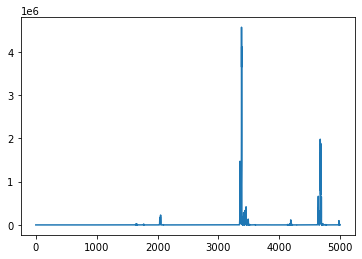

In [194]:
# reduction of loss
pd.Series(losses).plot()

In [165]:
int(X_train.shape[0]*0.2)

2